In [269]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import geopandas as gpd

from my_functions import pattern_missing

In [270]:
black = pd.read_csv('black.csv')
white = pd.read_csv('white.csv')
hispanic = pd.read_csv('hispanic.csv')
native = pd.read_csv('native_american_alaskan.csv')
asian = pd.read_csv('asain_pacific.csv')
foreign = pd.read_csv('foreign_born.csv')

education = pd.read_csv('education_bachelors.csv')
income = pd.read_csv('median_inc.csv')
unemployed = pd.read_csv('unemployed.csv')
poverty = pd.read_csv('person_poverty.csv')
under18 = pd.read_csv('under18.csv')
over65 = pd.read_csv('over65.csv')
population = pd.read_csv('population.csv')
crowding = pd.read_csv('crowding.csv')

crime = pd.read_csv('WI_offenses_20_23.csv')
wi = gpd.read_file("WI_CensusTL_Counties_2019.shp")

In [271]:
wi.head(2)

STATEFP COUNTYFP  COUNTYNS  GEOID    NAME       NAMELSAD LSAD CLASSFP  \
0      55      111  01581115  55111    Sauk    Sauk County   06      H1   
1      55      093  01581107  55093  Pierce  Pierce County   06      H1   

   MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND    AWATER     INTPTLAT  \
0  G4020   357  12660     None        A  2153685971  45692999  +43.4280010   
1  G4020   378  33460     None        A  1486700515  48452318  +44.7253365   

       INTPTLON                                           geometry  
0  -089.9433184  POLYGON ((-90.19196 43.555, -90.19676 43.55494...  
1  -092.4262793  POLYGON ((-92.69454 44.68874, -92.69466 44.688...

### Data Cleaning

In [272]:
black.rename(columns={'percent': 'prop_black'}, inplace=True)
black.drop(columns=['people'], inplace=True)

white.rename(columns={'percent': 'prop_white'}, inplace=True)
white.drop(columns=['people'], inplace=True)

hispanic.rename(columns={'percent': 'prop_hispanic'}, inplace=True)
hispanic.drop(columns=['people'], inplace=True)

asian.rename(columns={'percent': 'prop_asian'}, inplace=True)
native.rename(columns={'percent': 'prop_native'}, inplace=True)
foreign.rename(columns={'percent': 'prop_foreign'}, inplace=True)

education.rename(columns={'percent': 'prop_education'}, inplace=True)
education.drop(columns=['people'], inplace=True)

income.drop(columns=['people'], inplace=True)

unemployed.rename(columns={'percent': 'prop_unemployed'}, inplace=True)
unemployed.drop(columns=['people'], inplace=True)

poverty.rename(columns={'percent': 'prop_poverty'}, inplace=True)
poverty.drop(columns=['people'], inplace=True)

under18.rename(columns={'percent': 'prop_under18'}, inplace=True)
under18.drop(columns=['pepole'], inplace=True)

over65.rename(columns={'percent': 'prop_over65'}, inplace=True)

crowding.rename(columns={'percent': 'prop_crowding'}, inplace=True)

In [273]:
df0 = pd.merge(black, white, on=['county', 'FIPS']) 
df1 = pd.merge(df0, hispanic, on=['county', 'FIPS']) 
df2 = pd.merge(df1, native, on=['county', 'FIPS']) 
df3 = pd.merge(df2, asian, on=['county', 'FIPS']) 
df4 = pd.merge(df3, foreign, on=['county', 'FIPS']) 
df5 = pd.merge(df4, unemployed, on=['county', 'FIPS']) 
df6 = pd.merge(df5, poverty, on=['county', 'FIPS']) 
df7 = pd.merge(df6, under18, on=['county', 'FIPS']) 
df8= pd.merge(df7, over65, on=['county', 'FIPS']) 
df9 = pd.merge(df8, education, on=['county', 'FIPS']) 
df10 = pd.merge(df9, income, on=['county', 'FIPS']) 
df11 = pd.merge(df10, crowding, on=['county', 'FIPS']) 
df12 = pd.merge(df11, population, on=['county']) 
df12.head()

county     FIPS  prop_black  prop_white  prop_hispanic  \
0       Iron County  55051.0         0.1        95.0            1.6   
1      Price County  55099.0         0.2        94.4            2.1   
2  Menominee County  55078.0         0.2        11.8            8.4   
3     Vernon County  55123.0         0.2        95.4            1.7   
4     Taylor County  55119.0         0.2        95.7            2.4   

   prop_native  prop_asian  prop_foreign  prop_unemployed  prop_poverty  \
0          1.3         0.4           1.4              3.9          10.5   
1          0.5         1.3           1.5              2.7          13.6   
2         82.8         0.2           0.2             10.7          20.0   
3          0.1         0.3           1.0              2.5          14.6   
4          0.2         0.4           1.3              3.2           8.8   

   prop_under18  prop_over65  prop_education  median_income  prop_crowding  \
0          14.9         31.5            23.7          55777            0.5   
1          18.0         27.2            16.1          55822            2.2   
2          32.2         14.2            18.9          62194           14.8   
3          26.0         20.3            24.3          65177            2.3   
4          23.1         20.1            15.8          61360            1.8   

   population  
0        6228  
1       14102  
2        4226  
3       31170  
4       20058

In [274]:
df12['county'] = df12['county'].str.replace(" County", "", regex=False)
df = pd.merge(df12, crime, on=['county']) 
df.head()

county     FIPS  prop_black  prop_white  prop_hispanic  prop_native  \
0   Iron  55051.0         0.1        95.0            1.6          1.3   
1   Iron  55051.0         0.1        95.0            1.6          1.3   
2  Price  55099.0         0.2        94.4            2.1          0.5   
3  Price  55099.0         0.2        94.4            2.1          0.5   
4  Price  55099.0         0.2        94.4            2.1          0.5   

   prop_asian  prop_foreign  prop_unemployed  prop_poverty  ...  prop_over65  \
0         0.4           1.4              3.9          10.5  ...         31.5   
1         0.4           1.4              3.9          10.5  ...         31.5   
2         1.3           1.5              2.7          13.6  ...         27.2   
3         1.3           1.5              2.7          13.6  ...         27.2   
4         1.3           1.5              2.7          13.6  ...         27.2   

   prop_education  median_income  prop_crowding  population  total_offenses  \
0            23.7          55777            0.5        6228              59   
1            23.7          55777            0.5        6228              48   
2            16.1          55822            2.2       14102             289   
3            16.1          55822            2.2       14102             305   
4            16.1          55822            2.2       14102             349   

   crime_against_people  cime_against_property  crime_against_society  year  
0                    13                     39                      7  2021  
1                    21                     20                      7  2022  
2                    40                    141                    108  2020  
3                    29                    123                    153  2022  
4                    47                    149                    153  2023  

[5 rows x 21 columns]

In [275]:
# new variables: crime rates per 1,000 people
df['crime_per1000_people'] = (df['crime_against_people'] / df['population']) * 1000
df['crime_per1000_property'] = (df['cime_against_property'] / df['population']) * 1000
df['crime_per1000_society'] = (df['crime_against_society'] / df['population']) * 1000
df['crime_per1000_total'] = (df['total_offenses'] / df['population']) * 1000

# drop original columns and rename vars
df.drop(columns=['crime_against_people','cime_against_property','crime_against_society'], inplace=True)
#df.rename(columns={'centroid_lat': 'lat', 'centroid_long': 'long'}, inplace=True)

In [276]:
# round numeric variables
num_vars = df.drop(columns=['year', 'county', 'FIPS']).columns
df[num_vars] = df[num_vars].round(2)
df.head()

county     FIPS  prop_black  prop_white  prop_hispanic  prop_native  \
0   Iron  55051.0         0.1        95.0            1.6          1.3   
1   Iron  55051.0         0.1        95.0            1.6          1.3   
2  Price  55099.0         0.2        94.4            2.1          0.5   
3  Price  55099.0         0.2        94.4            2.1          0.5   
4  Price  55099.0         0.2        94.4            2.1          0.5   

   prop_asian  prop_foreign  prop_unemployed  prop_poverty  ...  \
0         0.4           1.4              3.9          10.5  ...   
1         0.4           1.4              3.9          10.5  ...   
2         1.3           1.5              2.7          13.6  ...   
3         1.3           1.5              2.7          13.6  ...   
4         1.3           1.5              2.7          13.6  ...   

   prop_education  median_income  prop_crowding  population  total_offenses  \
0            23.7          55777            0.5        6228              59   
1            23.7          55777            0.5        6228              48   
2            16.1          55822            2.2       14102             289   
3            16.1          55822            2.2       14102             305   
4            16.1          55822            2.2       14102             349   

   year  crime_per1000_people  crime_per1000_property  crime_per1000_society  \
0  2021                  2.09                    6.26                   1.12   
1  2022                  3.37                    3.21                   1.12   
2  2020                  2.84                   10.00                   7.66   
3  2022                  2.06                    8.72                  10.85   
4  2023                  3.33                   10.57                  10.85   

   crime_per1000_total  
0                 9.47  
1                 7.71  
2                20.49  
3                21.63  
4                24.75  

[5 rows x 22 columns]

In [277]:
# chagne percentages into proportions
perc_vars = df.drop(columns=['year', 'county', 'FIPS', 'population', 'total_offenses',
                            'crime_per1000_people', 'crime_per1000_property', 'crime_per1000_society']).columns
df[perc_vars] = df[perc_vars] / 100
df.head()

county     FIPS  prop_black  prop_white  prop_hispanic  prop_native  \
0   Iron  55051.0       0.001       0.950          0.016        0.013   
1   Iron  55051.0       0.001       0.950          0.016        0.013   
2  Price  55099.0       0.002       0.944          0.021        0.005   
3  Price  55099.0       0.002       0.944          0.021        0.005   
4  Price  55099.0       0.002       0.944          0.021        0.005   

   prop_asian  prop_foreign  prop_unemployed  prop_poverty  ...  \
0       0.004         0.014            0.039         0.105  ...   
1       0.004         0.014            0.039         0.105  ...   
2       0.013         0.015            0.027         0.136  ...   
3       0.013         0.015            0.027         0.136  ...   
4       0.013         0.015            0.027         0.136  ...   

   prop_education  median_income  prop_crowding  population  total_offenses  \
0           0.237         557.77          0.005        6228              59   
1           0.237         557.77          0.005        6228              48   
2           0.161         558.22          0.022       14102             289   
3           0.161         558.22          0.022       14102             305   
4           0.161         558.22          0.022       14102             349   

   year  crime_per1000_people  crime_per1000_property  crime_per1000_society  \
0  2021                  2.09                    6.26                   1.12   
1  2022                  3.37                    3.21                   1.12   
2  2020                  2.84                   10.00                   7.66   
3  2022                  2.06                    8.72                  10.85   
4  2023                  3.33                   10.57                  10.85   

   crime_per1000_total  
0               0.0947  
1               0.0771  
2               0.2049  
3               0.2163  
4               0.2475  

[5 rows x 22 columns]

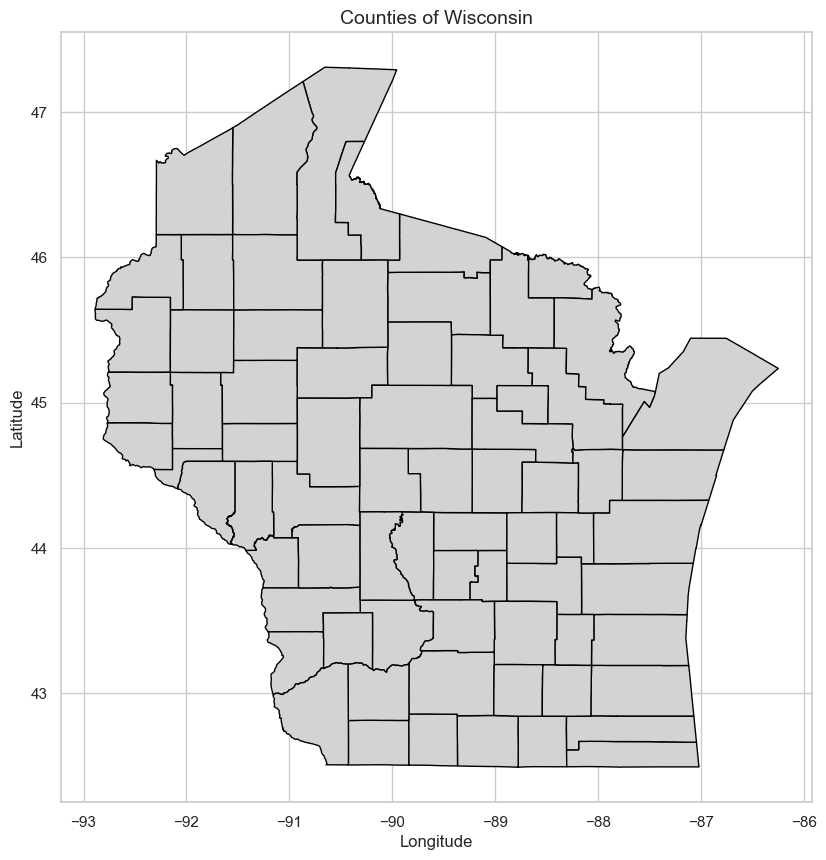

In [278]:
# county coundaries
fig, ax = plt.subplots(figsize=(10, 10))
wi.plot(ax=ax, edgecolor='black', color='lightgray')

ax.set_title("Counties of Wisconsin", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

### EDA

In [279]:
median_values = df[num_vars].median()
print(median_values)

prop_black                    0.0080
prop_white                    0.9145
prop_hispanic                 0.0340
prop_native                   0.0030
prop_asian                    0.0070
prop_foreign                  0.0250
prop_unemployed               0.0320
prop_poverty                  0.1005
prop_under18                  0.2090
prop_over65                   0.1940
prop_education                0.2395
median_income               687.3100
prop_crowding                 0.0140
population                45762.0000
total_offenses              554.0000
crime_per1000_people          1.9900
crime_per1000_property        4.7550
crime_per1000_society         3.9100
crime_per1000_total           0.1056
dtype: float64


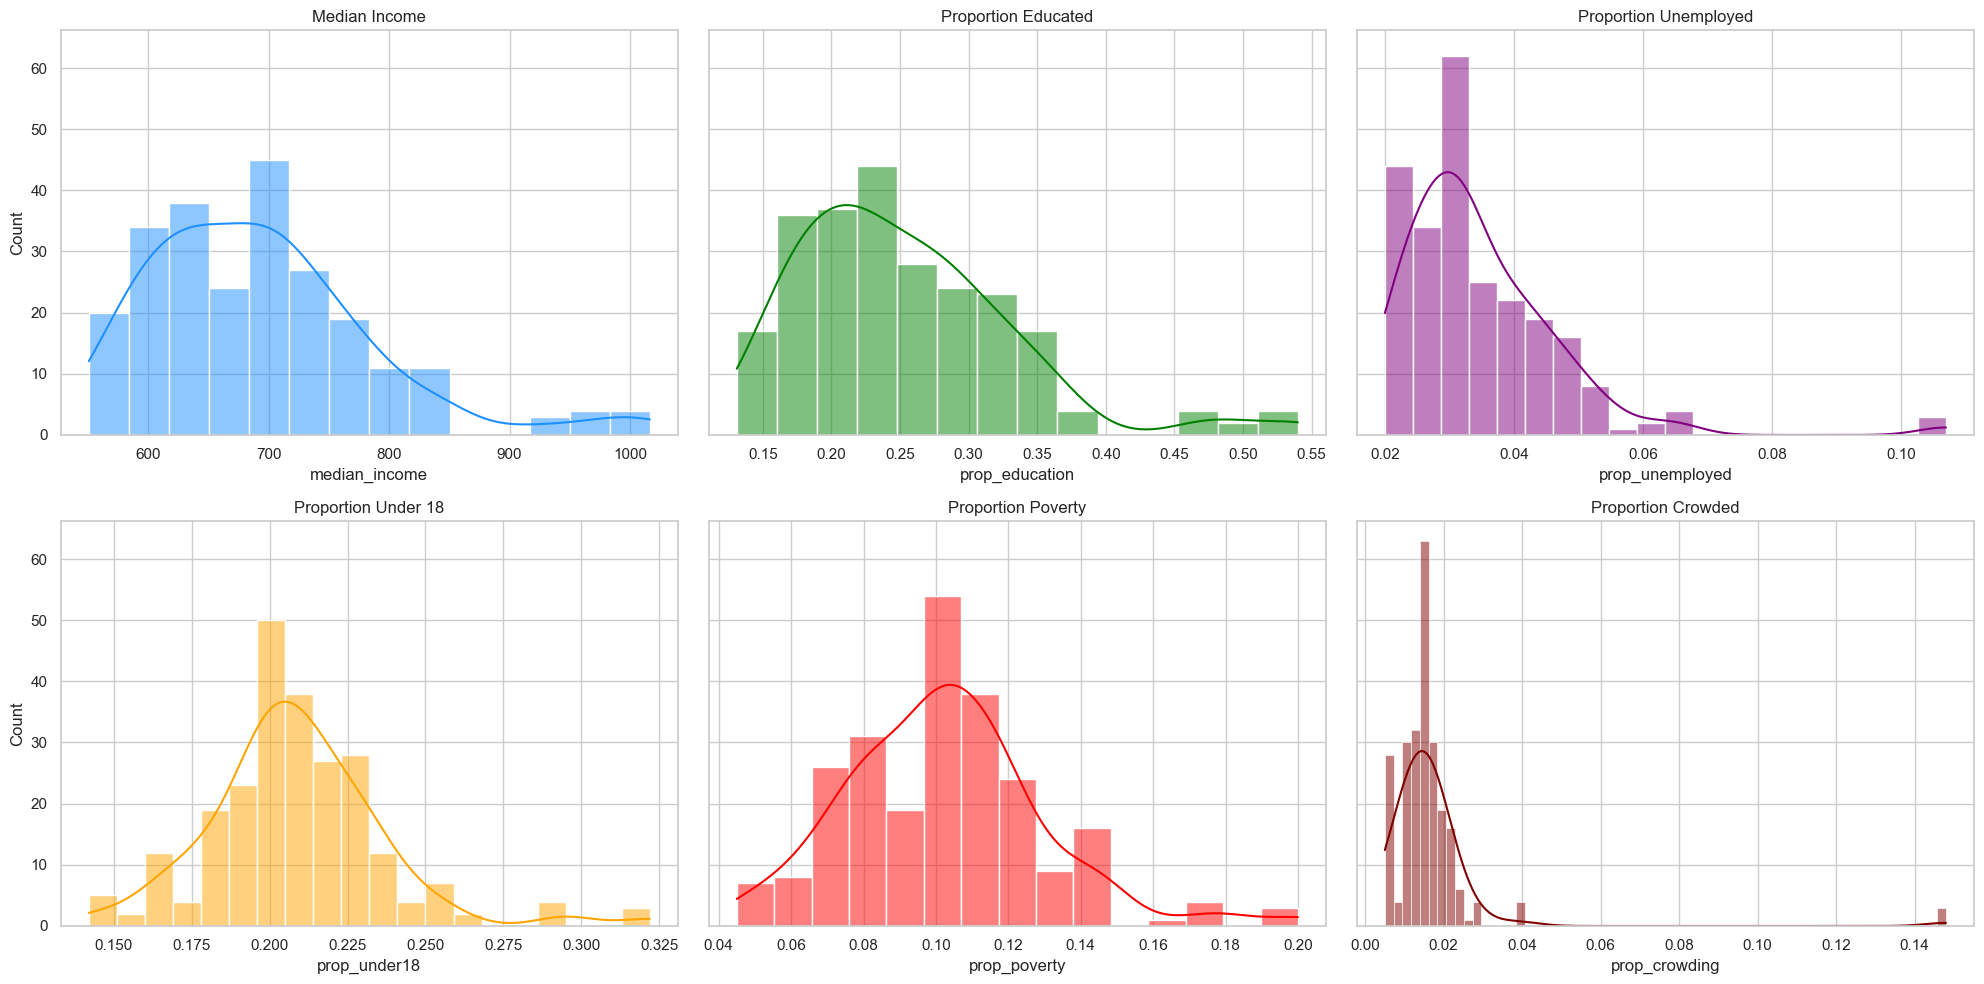

In [189]:
# demographics

fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)

# 1st row of histograms
sns.histplot(df['median_income'], kde=True, alpha=0.5, color='dodgerblue', ax=axes[0, 0])
axes[0, 0].set_title('Median Income')

sns.histplot(df['prop_education'], kde=True, alpha=0.5, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Proportion Educated')

sns.histplot(df['prop_unemployed'], kde=True, alpha=0.5, color='purple', ax=axes[0, 2])
axes[0, 2].set_title('Proportion Unemployed')

# 2nd row of histograms
sns.histplot(df['prop_under18'], kde=True, alpha=0.5, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Proportion Under 18')

sns.histplot(df['prop_poverty'], kde=True, alpha=0.5, color='red', ax=axes[1, 1])
axes[1, 1].set_title('Proportion Poverty')

sns.histplot(df['prop_crowding'], kde=True, alpha=0.5, color='maroon', ax=axes[1, 2])
axes[1, 2].set_title('Proportion Crowded')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Proportion Foreign Born')

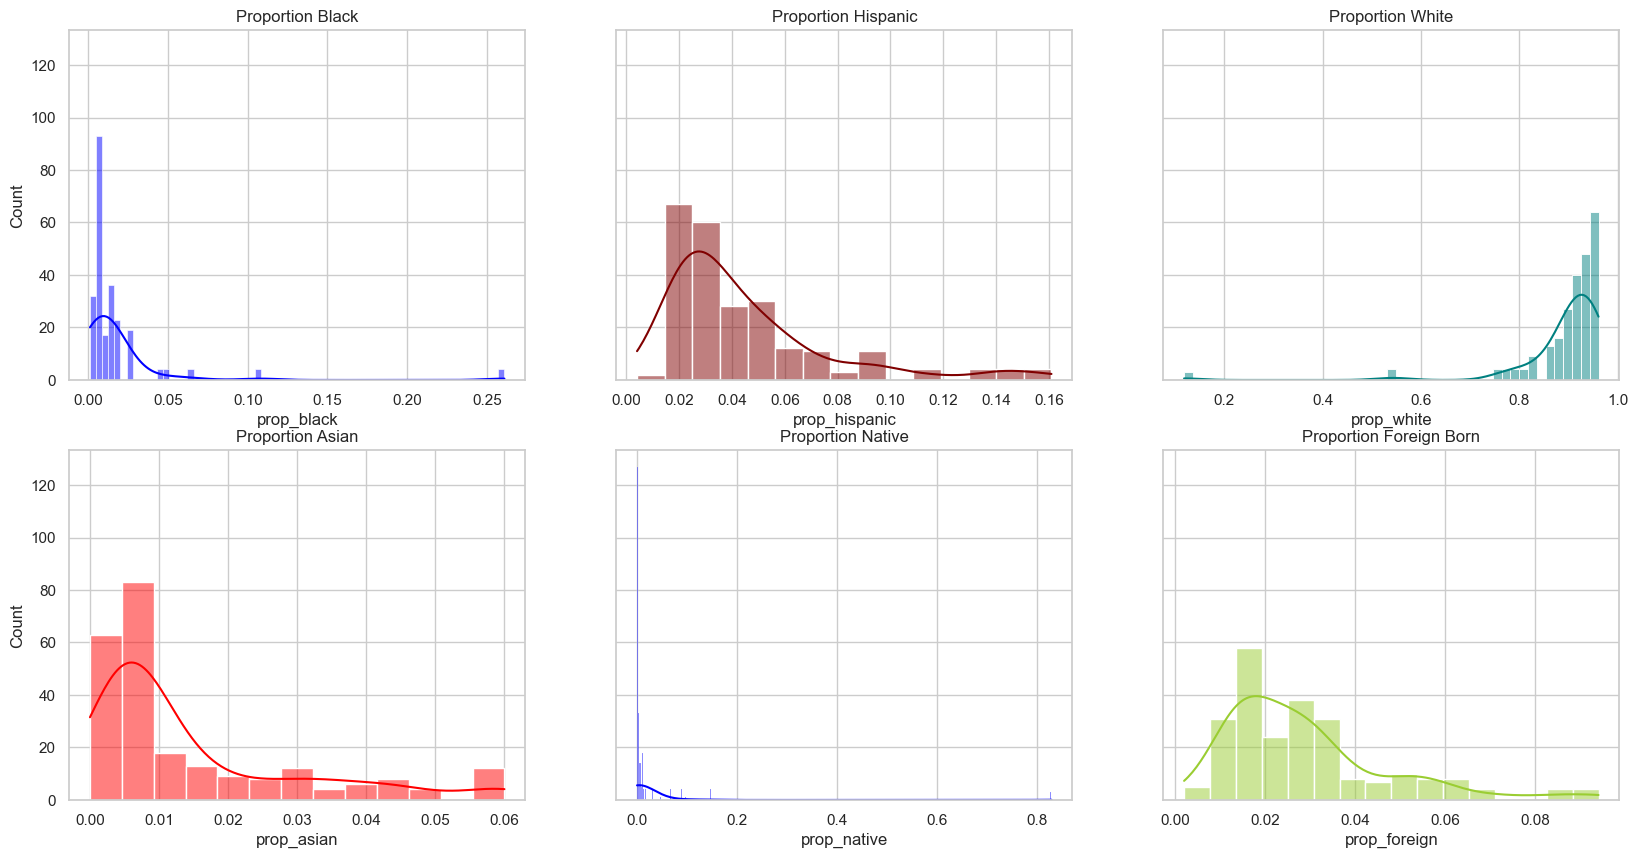

In [190]:
# race

fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)

#1st row
sns.histplot(df['prop_black'], kde=True, alpha=0.5, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Proportion Black')

sns.histplot(df['prop_hispanic'], kde=True, alpha=0.5, color='maroon', ax=axes[0, 1])
axes[0, 1].set_title('Proportion Hispanic')

sns.histplot(df['prop_white'], kde=True, alpha=0.5, color='teal', ax=axes[0, 2])
axes[0, 2].set_title('Proportion White')

# 2nd row of histograms
sns.histplot(df['prop_asian'], kde=True, alpha=0.5, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Proportion Asian')

sns.histplot(df['prop_native'], kde=True, alpha=0.5, color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Proportion Native')

sns.histplot(df['prop_foreign'], kde=True, alpha=0.5, color='yellowgreen', ax=axes[1, 2])
axes[1, 2].set_title('Proportion Foreign Born')

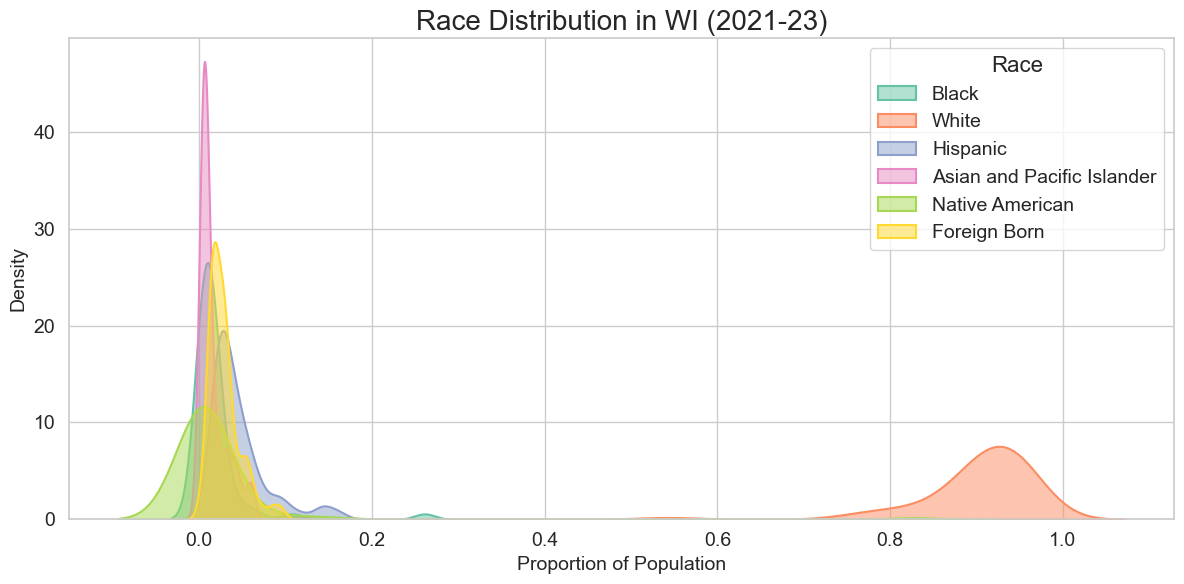

In [191]:
long_df = pd.melt(df[['prop_black', 'prop_white', 'prop_hispanic',
                  'prop_asian', 'prop_native', 'prop_foreign']], var_name='Race', value_name='Proportion')

# Rename
long_df['Race'] = long_df['Race'].replace({
    'prop_black': 'Black',
    'prop_white': 'White',
    'prop_hispanic': 'Hispanic',
    'prop_asian': 'Asian and Pacific Islander',
    'prop_native': 'Native American',
    'prop_foreign': 'Foreign Born'
})
palette = sns.color_palette("Set2", 6)

plt.figure(figsize=(12, 6))
# Plot KDEs for each crime type using a loop
for race, color in zip(long_df['Race'].unique(), palette):
    sns.kdeplot(
        data=long_df[long_df['Race'] == race],
        x='Proportion',
        fill=True,
        alpha=0.5,
        linewidth=1.5,
        label=race,
        color=color)

plt.title('Race Distribution in WI (2021-23)', fontsize=20)
plt.xlabel('Proportion of Population', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Race', loc='upper right', title_fontsize=16, fontsize=14)
plt.tight_layout()
plt.savefig('race_distribution.png')

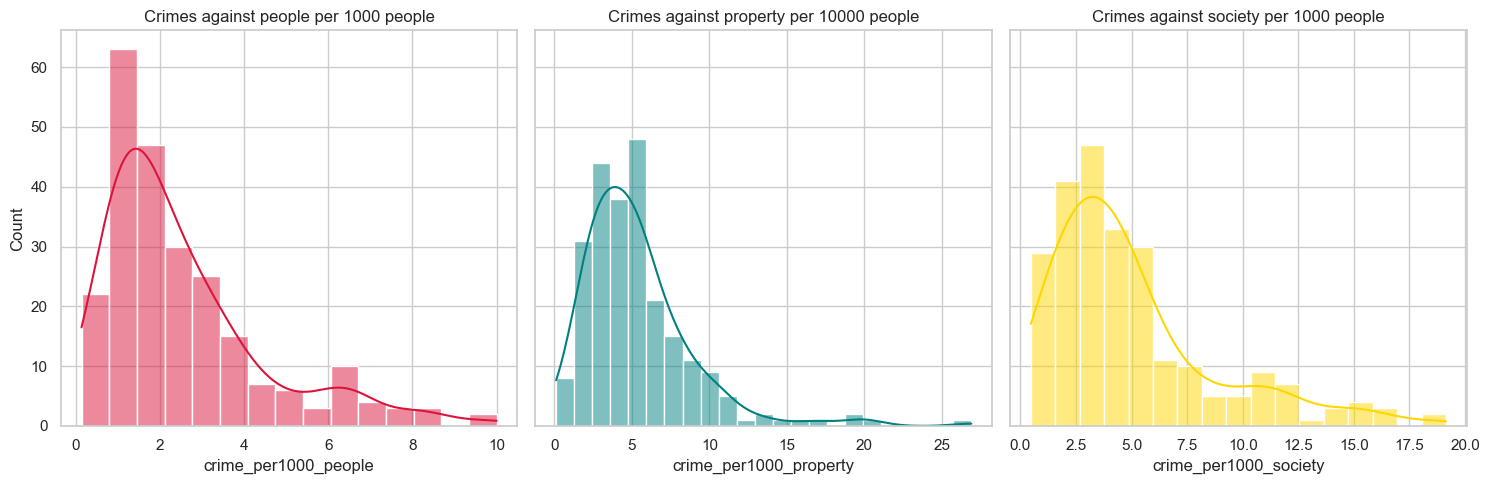

In [192]:
# crimes

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot each crime variable on a separate subplot
sns.histplot(df['crime_per1000_people'], kde=True, alpha=0.5, color='crimson', ax=axes[0])
axes[0].set_title('Crimes against people per 1000 people')

sns.histplot(df['crime_per1000_property'], kde=True, alpha=0.5, color='teal', ax=axes[1])
axes[1].set_title('Crimes against property per 10000 people')

sns.histplot(df['crime_per1000_society'], kde=True, alpha=0.5, color='gold', ax=axes[2])
axes[2].set_title('Crimes against society per 1000 people')

plt.tight_layout()
plt.show()

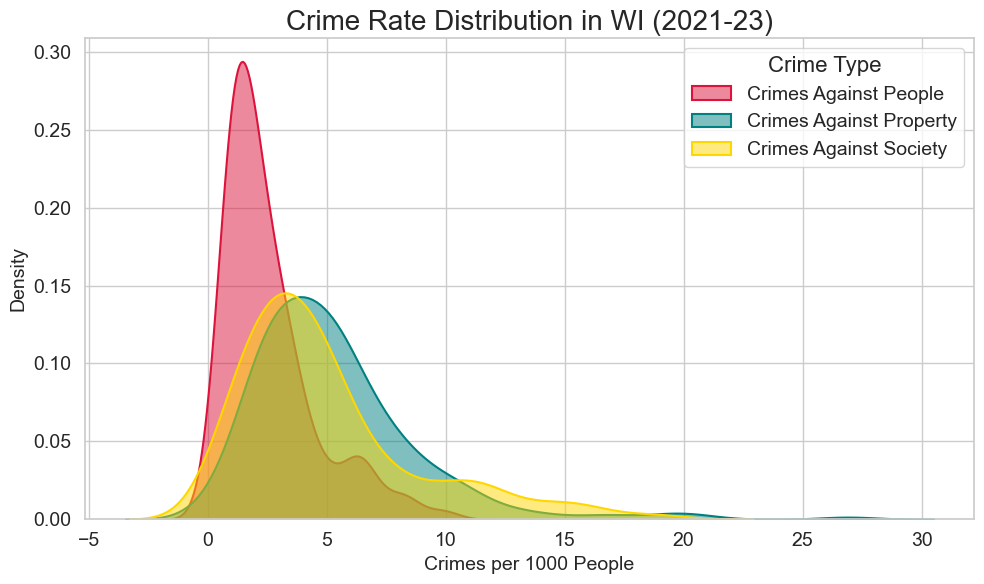

In [193]:
crime_data=['crime_per1000_people', 'crime_per1000_property', 'crime_per1000_society']

long_df = pd.melt(df[crime_data], var_name='Crime Type', value_name='Rate')

# Rename
long_df['Crime Type'] = long_df['Crime Type'].replace({
    'crime_per1000_people': 'Crimes Against People',
    'crime_per1000_property': 'Crimes Against Property',
    'crime_per1000_society': 'Crimes Against Society'
})

plt.figure(figsize=(10, 6))
palette = ['crimson', 'teal', 'gold']

# Plot KDEs for each crime type using a loop
for crime_type, color in zip(long_df['Crime Type'].unique(), palette):
    sns.kdeplot(
        data=long_df[long_df['Crime Type'] == crime_type],
        x='Rate',
        fill=True,
        alpha=0.5,
        linewidth=1.5,
        label=crime_type,
        color=color)

plt.title('Crime Rate Distribution in WI (2021-23)', fontsize=20)
plt.xlabel('Crimes per 1000 People', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Crime Type', loc='upper right', title_fontsize=16, fontsize=14)
plt.tight_layout()
plt.savefig('crime_distribution.png')

Text(0, 0.5, 'Crimes per 1000 People')

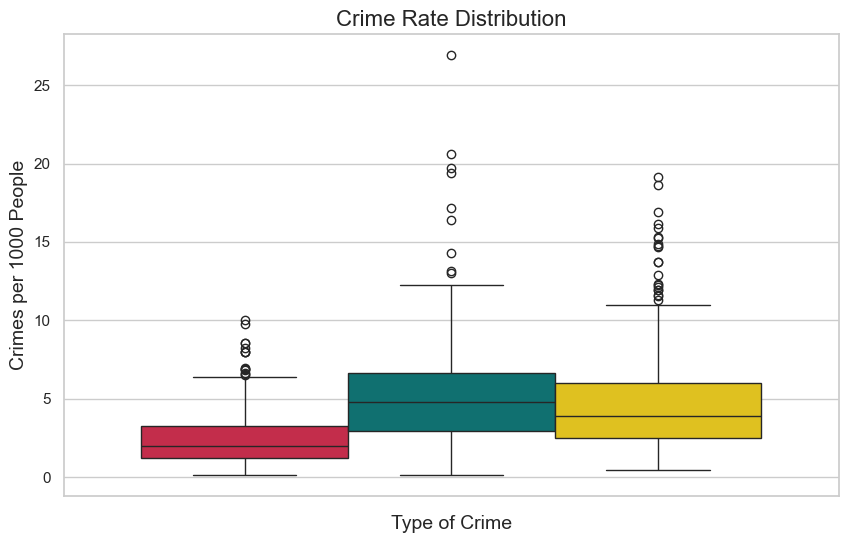

In [194]:
# boxplot

palette = ['crimson', 'teal', 'gold']
plt.figure(figsize=(10, 6))
sns.boxplot(hue='Crime Type', y='Rate', data=long_df, palette=palette, legend=False)

plt.title('Crime Rate Distribution', fontsize=16)
plt.xlabel('Type of Crime', fontsize=14)
plt.ylabel('Crimes per 1000 People', fontsize=14)

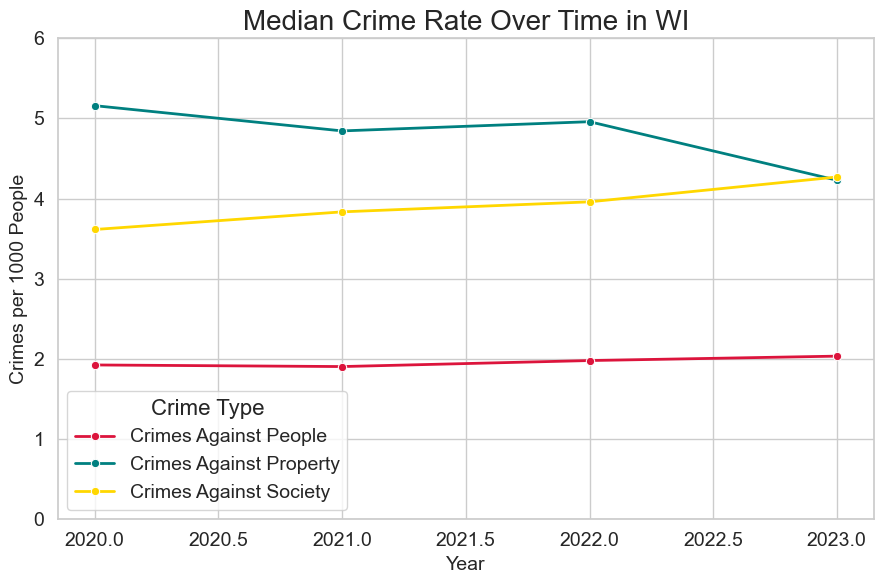

In [195]:
# crime over time
long_df = pd.melt(df[crime_data + ['year']], id_vars='year', var_name='Crime Type', value_name='Rate')
long_df['Crime Type'] = long_df['Crime Type'].replace({
    'crime_per1000_people': 'Crimes Against People',
    'crime_per1000_property': 'Crimes Against Property',
    'crime_per1000_society': 'Crimes Against Society'
})
median_crime_df = long_df.groupby(['year', 'Crime Type'])['Rate'].median().reset_index()

# Plot crime rates over time
plt.figure(figsize=(9, 6))
palette = ['crimson', 'teal', 'gold']

for crime_type, color in zip(median_crime_df['Crime Type'].unique(), palette):
    sns.set(style="whitegrid")  # White grid background
    sns.lineplot(
        data=median_crime_df[median_crime_df['Crime Type'] == crime_type],
        x='year',
        y='Rate',
        label=crime_type,
        color=color,
        linewidth=2,
        marker='o',
        errorbar=None)

plt.title('Median Crime Rate Over Time in WI', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Crimes per 1000 People', fontsize=14)
plt.ylim(0, 6)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Crime Type', loc='best', title_fontsize=16, fontsize=14)
plt.tight_layout()
plt.savefig('crime_over_time.png')

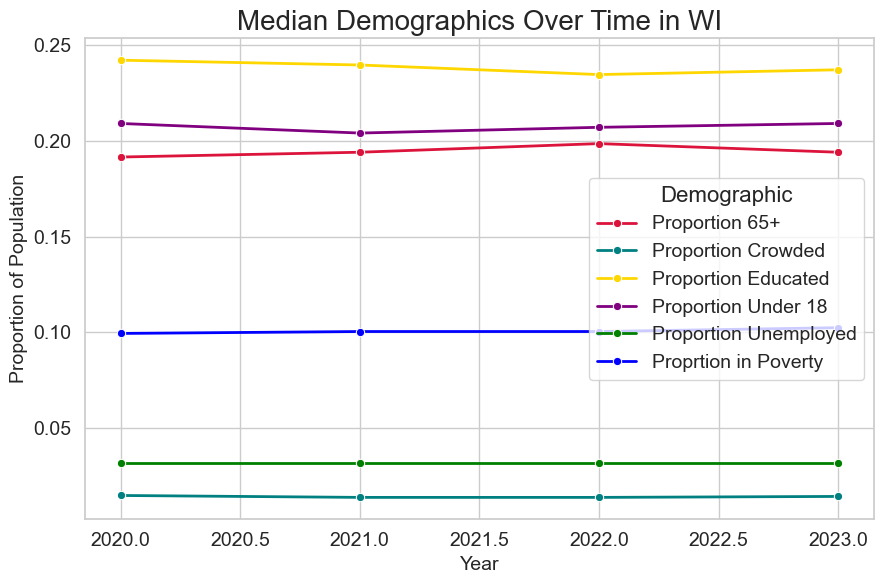

In [196]:
# demographics over time
long_df = pd.melt(df[['prop_unemployed', 'prop_poverty', 'prop_crowding', 'prop_education', 'prop_under18', 'prop_over65', 'year']], 
                  id_vars='year', var_name='Demographic', value_name='Proportion')

long_df['Demographic'] = long_df['Demographic'].replace({
    'prop_unemployed': 'Proportion Unemployed',
    'prop_poverty': 'Proprtion in Poverty',
    'prop_crowding': 'Proportion Crowded',
    'prop_education': 'Proportion Educated',
    'prop_under18': 'Proportion Under 18',
    'prop_over65': 'Proportion 65+'
})

median_dem_df = long_df.groupby(['year', 'Demographic'])['Proportion'].median().reset_index()

# Plot crime rates over time
plt.figure(figsize=(9, 6))
palette = ['crimson', 'teal', 'gold', 'purple', 'green', 'blue']

for dem, color in zip(median_dem_df['Demographic'].unique(), palette):
    sns.set(style="whitegrid")  # White grid background
    sns.lineplot(
        data=median_dem_df[median_dem_df['Demographic'] == dem],
        x='year',
        y='Proportion',
        label=dem,
        color=color,
        linewidth=2,
        marker='o',
        errorbar=None)

plt.title('Median Demographics Over Time in WI', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Proportion of Population', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Demographic', loc='best', title_fontsize=16, fontsize=14)
plt.tight_layout()

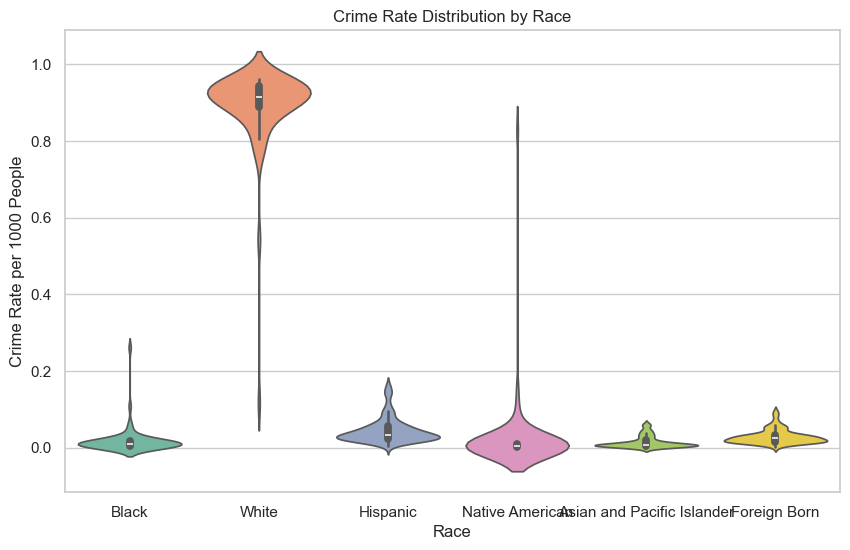

In [197]:
# long format
long_df = pd.melt(df[['county', 'year', 'prop_black', 'prop_white', 'prop_hispanic', 'prop_native', 'prop_asian',
                      'prop_foreign', 'crime_per1000_people', 'crime_per1000_property', 'crime_per1000_society', 'crime_per1000_total']],
                  id_vars=['county', 'year'],
                  value_vars=['prop_black', 'prop_white', 'prop_hispanic', 'prop_native', 'prop_asian' , 'prop_foreign'],
                  var_name='Race',
                  value_name='Percent')

# rename
long_df['Race'] = long_df['Race'].replace({
    'prop_black': 'Black',
    'prop_white': 'White',
    'prop_hispanic': 'Hispanic',
    'prop_native': 'Native American',
    'prop_asian': 'Asian and Pacific Islander',
    'prop_foreign': 'Foreign Born'})


plt.figure(figsize=(10, 6))
sns.violinplot(x='Race', y='Percent', data=long_df, hue='Race', palette='Set2', legend=False)
plt.title('Crime Rate Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Crime Rate per 1000 People')
plt.show()

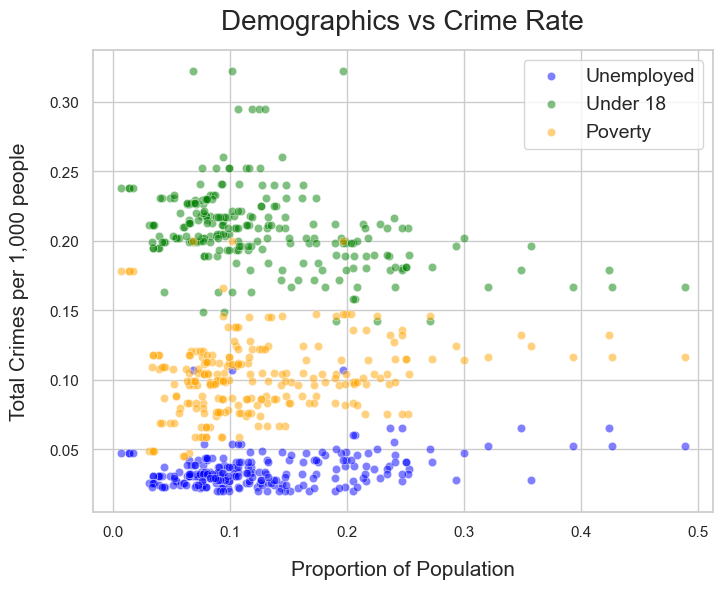

In [199]:
# scatterplot of population characteristics against total crime rate
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, y='prop_unemployed', x='crime_per1000_total', label='Unemployed', color='blue', alpha=0.5)
sns.scatterplot(data=df, y='prop_under18', x='crime_per1000_total', label='Under 18', color='green', alpha=0.5)
sns.scatterplot(data=df, y='prop_poverty', x='crime_per1000_total', label='Poverty', color='orange', alpha=0.5)

plt.title('Demographics vs Crime Rate', fontsize=20, pad=15)
plt.xlabel('Proportion of Population', fontsize=15, labelpad=15)
plt.ylabel('Total Crimes per 1,000 people', fontsize=15, labelpad=15)
plt.legend(fontsize=14, loc='upper right')
plt.savefig('dem_crime_scatter.png', dpi=300, bbox_inches='tight')

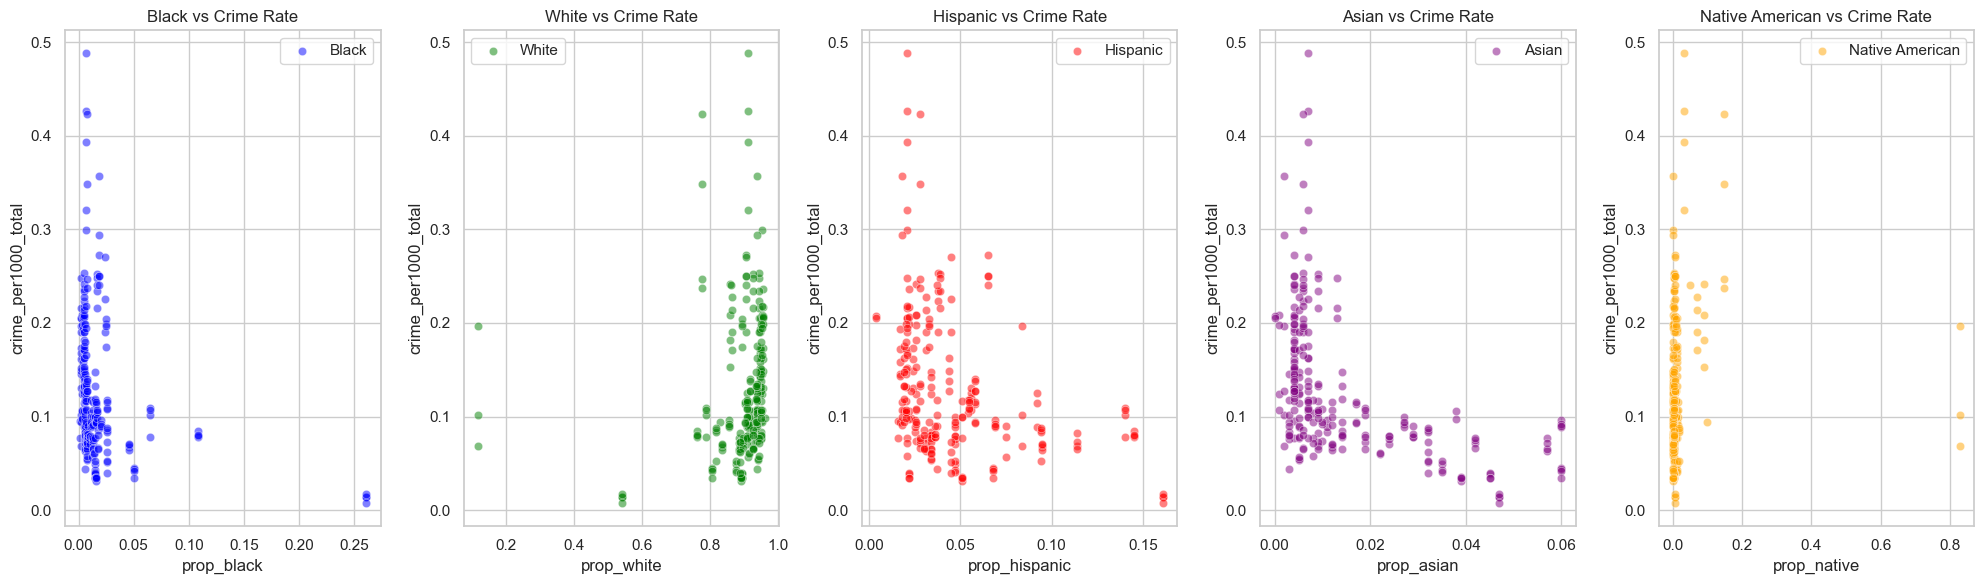

In [200]:
# race and total crime rate
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

sns.scatterplot(data=df, x='prop_black', y='crime_per1000_total', label='Black', color='blue', alpha=0.5, ax=axes[0])
axes[0].set_title('Black vs Crime Rate')

sns.scatterplot(data=df, x='prop_white', y='crime_per1000_total', label='White', color='green', alpha=0.5, ax=axes[1])
axes[1].set_title('White vs Crime Rate')

sns.scatterplot(data=df, x='prop_hispanic', y='crime_per1000_total', label='Hispanic', color='red', alpha=0.5, ax=axes[2])
axes[2].set_title('Hispanic vs Crime Rate')

sns.scatterplot(data=df, x='prop_asian', y='crime_per1000_total', label='Asian', color='purple', alpha=0.5, ax=axes[3])
axes[3].set_title('Asian vs Crime Rate')

sns.scatterplot(data=df, x='prop_native', y='crime_per1000_total', label='Native American', color='orange', alpha=0.5, ax=axes[4])
axes[4].set_title('Native American vs Crime Rate')

plt.tight_layout()
plt.show()

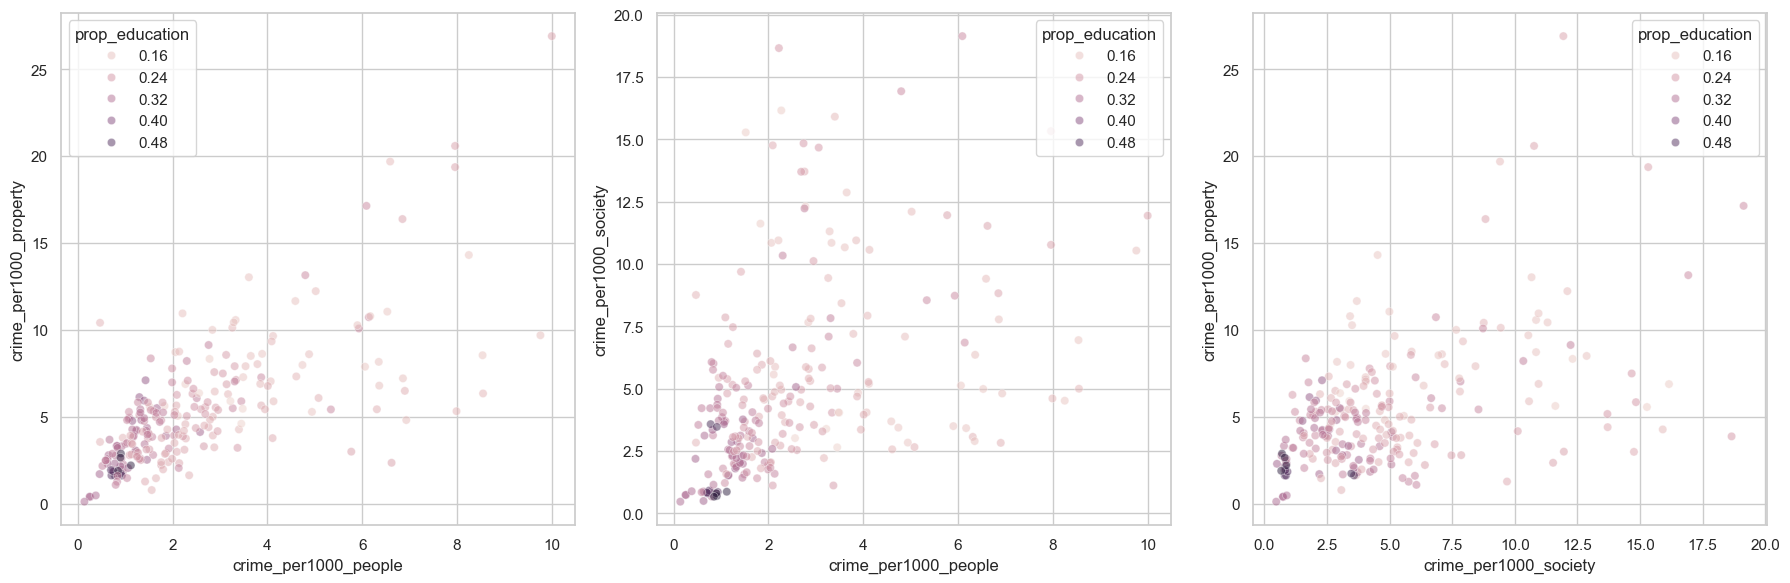

In [201]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df, x='crime_per1000_people', y='crime_per1000_property', hue='prop_education', alpha=0.5, ax=axes[0])
sns.scatterplot(data=df, x='crime_per1000_people', y='crime_per1000_society', hue='prop_education', alpha=0.5, ax=axes[1])
sns.scatterplot(data=df, x='crime_per1000_society', y='crime_per1000_property', hue='prop_education', alpha=0.5, ax=axes[2])

plt.tight_layout()
plt.show()

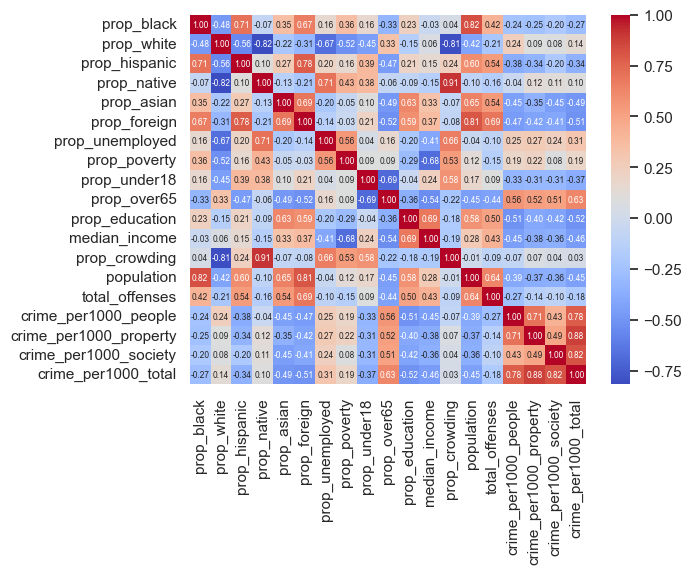

In [202]:
num_vars = df.drop(columns=['county', 'FIPS', 'year'])
corr_matrix = num_vars.corr()
sns.heatmap(corr_matrix, 
            annot=True,                    
            fmt=".2f",                     
            annot_kws={"size": 6},        
            cmap="coolwarm",
            cbar=True)
plt.show()

In [203]:
# 3d scatterplot of raw crime data
import plotly.express as px
np.random.seed(17)

fig = px.scatter_3d(df, x='crime_per1000_people', y='crime_per1000_property', z='crime_per1000_society',
                   hover_data={'county': True,
                               'year': True
    })
fig.update_traces(marker=dict(size=3, opacity=0.7))
fig.show()

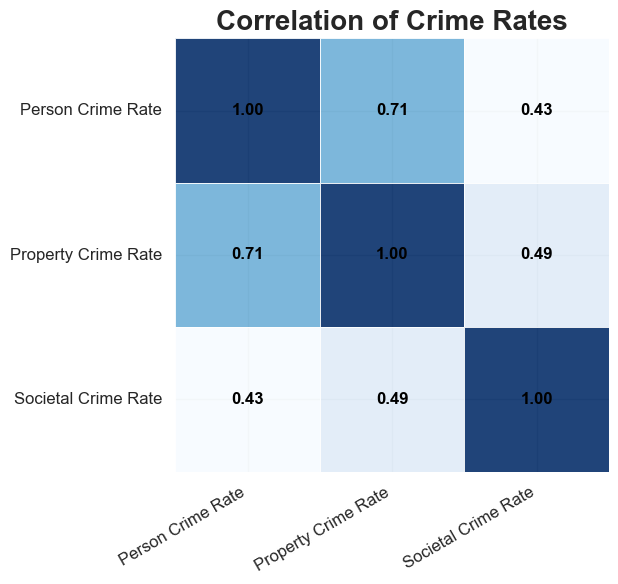

In [204]:
# correlation of different crime rates
corr_matrix = df[crime_data].corr()
rename = {
    'crime_per1000_people': 'Person Crime Rate',
    'crime_per1000_property': 'Property Crime Rate',
    'crime_per1000_society': 'Societal Crime Rate'}

# Rename the columns and rows of the correlation matrix
corr_matrix = corr_matrix.rename(columns=rename, index=rename)


plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, 
            annot=True,                    
            fmt=".2f",                     
            annot_kws={"size":12, "weight": "bold", "color": "black"}, 
            cmap="Blues",  
            cbar=False,
            linewidths=0.5,                
            linecolor='white',              
            xticklabels=corr_matrix.columns,  
            yticklabels=corr_matrix.columns,  
            cbar_kws={"shrink": 0.8},  
            alpha=0.9,
            square=True)                   

plt.xticks(rotation=30, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation of Crime Rates', fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig('corr_plot.png')

### PCA

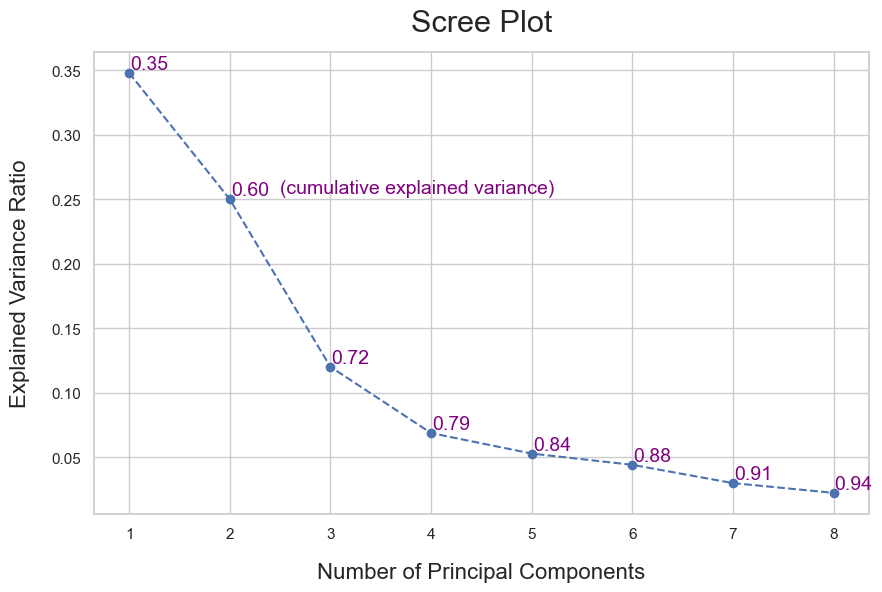

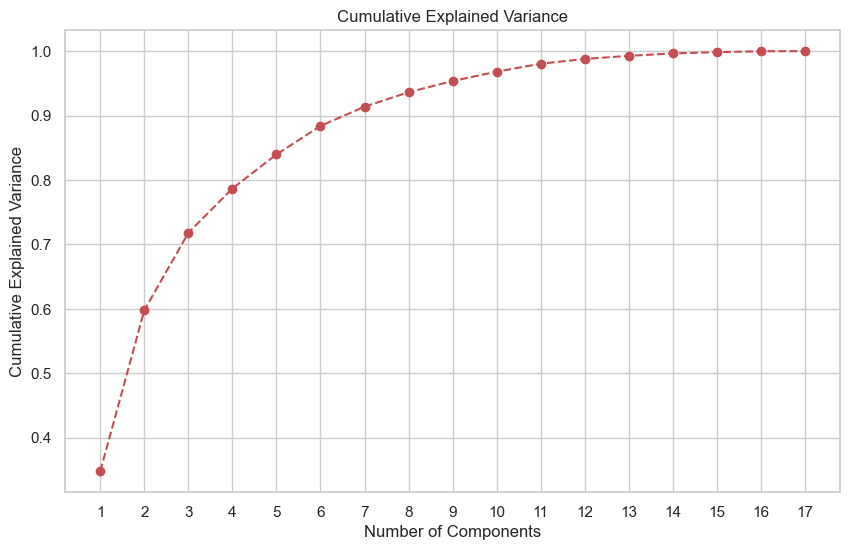

In [205]:
# PCA on all numerical data
np.random.seed(17)

df_pca = df.drop(columns=['FIPS', 'county', 'total_offenses', 'year', 'crime_per1000_total'])

# standardize all data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

# fit PCA
pca = PCA()
pca.fit(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_[:8] # first 8 pc
cumulative_variance = pca.explained_variance_ratio_.cumsum()[:8]

# scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot', fontsize=22, pad=15)
plt.xlabel('Number of Principal Components', fontsize=16, labelpad=15)
plt.ylabel('Explained Variance Ratio', fontsize=16, labelpad=15)
plt.xticks(range(1, 9))
plt.grid(True)

# Annotate cumulative variance at each point
for i, cum_var in enumerate(cumulative_variance):
    plt.text(i + 1.2, explained_variance_ratio[i], f'{cum_var:.2f}', ha='center', va='bottom', fontsize=14, color='purple')
plt.text(2.5, .255, '(cumulative explained variance)', color='purple', fontsize=14)
plt.savefig('scree_plot.png')
plt.show()

# cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)

In [207]:
# PCA
pca = PCA(n_components=3)  
pca_result = pca.fit_transform(scaled_data)
loadings = pca.components_.T

# view loadings in df
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], 
                           index=df_pca.columns)

print(loadings_df)

                             PC1       PC2       PC3
prop_black              0.257742  0.132207  0.425450
prop_white             -0.183672 -0.412567  0.020028
prop_hispanic           0.285051  0.162282  0.188149
prop_native            -0.003779  0.410251 -0.275576
prop_asian              0.293890 -0.074689  0.116572
prop_foreign            0.354421 -0.030072  0.251643
prop_unemployed        -0.060191  0.404433  0.075113
prop_poverty           -0.029660  0.362339  0.253172
prop_under18            0.189406  0.187349 -0.378792
prop_over65            -0.318467 -0.021633  0.257481
prop_education          0.279691 -0.148410  0.001078
median_income           0.227265 -0.222357 -0.304535
prop_crowding           0.039755  0.433613 -0.258760
population              0.334849  0.029587  0.311577
crime_per1000_people   -0.294629  0.054027  0.213070
crime_per1000_property -0.270481  0.101379  0.171970
crime_per1000_society  -0.247455  0.084863  0.138077


<Figure size 1400x800 with 0 Axes>

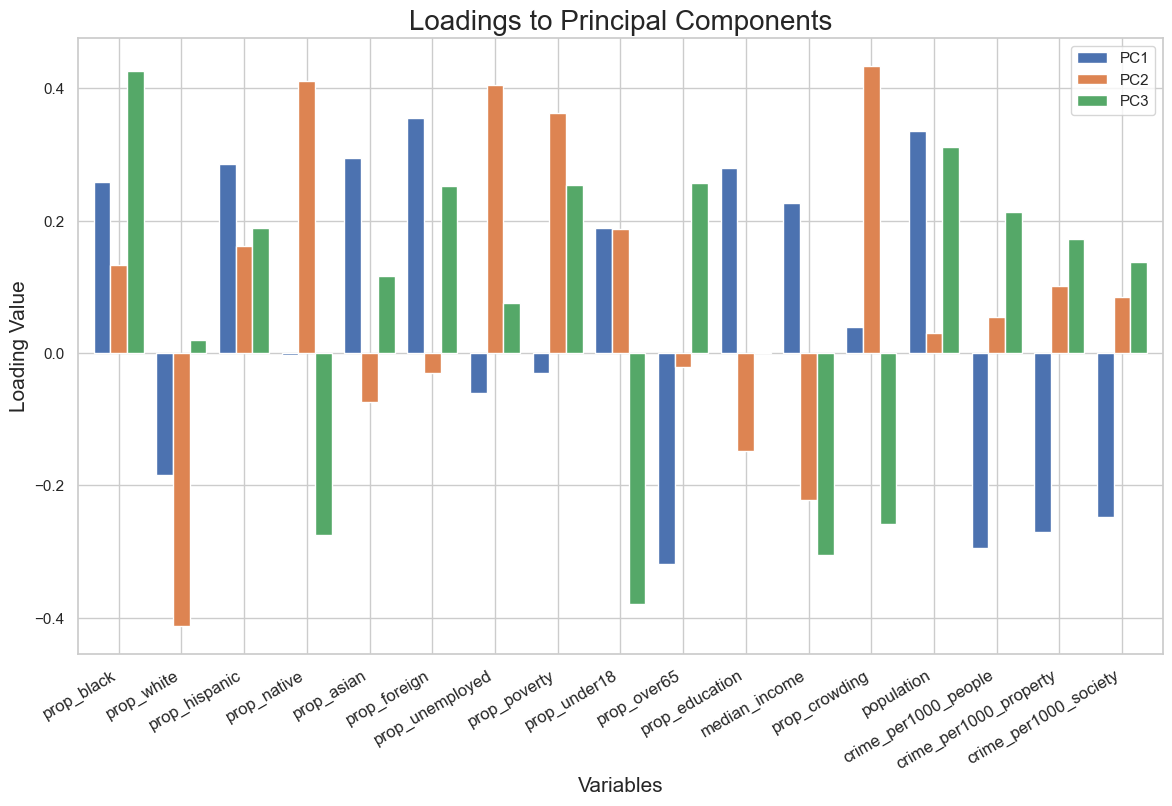

In [208]:
# Plotting the loadings
plt.figure(figsize=(14, 8))
loadings_df.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Loadings to Principal Components', fontsize=20)
plt.ylabel('Loading Value', fontsize=15)
plt.xlabel('Variables', fontsize=15)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.show()

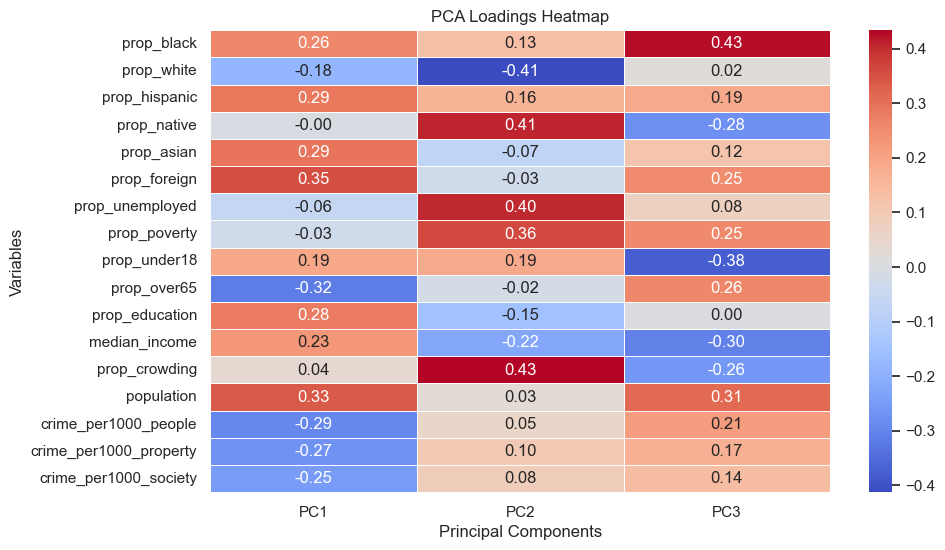

In [209]:
# loadings heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=0.5)
plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Variables')
plt.show()

In [254]:
# interactive PCA plot
import plotly.express as px
import plotly.graph_objects as go


# add PC to df
df_pca['PC1'] = pca_result[:, 0].round(2)
df_pca['PC2'] = pca_result[:, 1].round(2)
df_pca['PC3'] = pca_result[:, 2].round(2)
df_pca['county'] = df.loc[df_pca.index, 'county']
df_pca['year'] = df.loc[df_pca.index, 'year']
df_pca['crime_per1000_total'] = df.loc[df_pca.index, 'crime_per1000_total']



# interactive 3D scatter plot
fig = px.scatter_3d(
    df_pca, x='PC1', y='PC2', z='PC3', 
    color='crime_per1000_total', 
    hover_name='county',
    hover_data={
        'county': False,
        'crime_per1000_total': True,
        'year': True
    },
    title='PCA by Total Crime Rate',
    labels={'crime_per1000_total': 'Total Crime Rate', 
            'prop_education':'Education Rate (Bachelors)',
            'year':'Year'},
    color_continuous_scale='viridis')

fig.update_traces(marker=dict(size=3)) 

fig.update_layout(
    legend=dict(title="Proportion Educated", traceorder="normal"),  # Ensures proper legend sorting
    margin=dict(l=0, r=200, t=50, b=50)
)

# legend
fig.update_layout(legend=dict(x=-.2,
                              y=0.5,
                              font=dict(size=10),
                              bgcolor="rgba(255,255,255,0.8)"),
                  margin=dict(l=0, r=200, t=50, b=50))
fig.write_html("interactive_pca_plot.html")
fig.show()

### Clustering

In [211]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_std = df.copy()

# Subset the data
crime_data = ['crime_per1000_people', 'crime_per1000_property', 'crime_per1000_society']
num_data = (df_std.drop(columns=['county', 'FIPS', 'year'])).columns

# standardize
scaler = StandardScaler()
#df_std[crime_data] = scaler.fit_transform(df_std[crime_data])
df_std[num_data] = scaler.fit_transform(df_std[num_data])
df_std.head()

county     FIPS  prop_black  prop_white  prop_hispanic  prop_native  \
0   Iron  55051.0   -0.483884    0.522634      -0.902116    -0.084427   
1   Iron  55051.0   -0.483884    0.522634      -0.902116    -0.084427   
2  Price  55099.0   -0.455954    0.467677      -0.747490    -0.169608   
3  Price  55099.0   -0.455954    0.467677      -0.747490    -0.169608   
4  Price  55099.0   -0.455954    0.467677      -0.747490    -0.169608   

   prop_asian  prop_foreign  prop_unemployed  prop_poverty  ...  \
0   -0.693369     -0.801364         0.328495      0.096766  ...   
1   -0.693369     -0.801364         0.328495      0.096766  ...   
2   -0.113099     -0.746865        -0.616626      1.223432  ...   
3   -0.113099     -0.746865        -0.616626      1.223432  ...   
4   -0.113099     -0.746865        -0.616626      1.223432  ...   

   prop_education  median_income  prop_crowding  population  total_offenses  \
0       -0.195618      -1.423035      -0.727497   -0.595982       -1.319297   
1       -0.195618      -1.423035      -0.727497   -0.595982       -1.342557   
2       -1.149137      -1.418283       0.342120   -0.541293       -0.832959   
3       -1.149137      -1.418283       0.342120   -0.541293       -0.799127   
4       -1.149137      -1.418283       0.342120   -0.541293       -0.706089   

   year  crime_per1000_people  crime_per1000_property  crime_per1000_society  \
0  2021             -0.234982                0.259523              -1.022639   
1  2022              0.429719               -0.593396              -1.022639   
2  2020              0.154491                1.305396               0.715309   
3  2022             -0.250561                0.947450               1.563024   
4  2023              0.408947                1.464794               1.563024   

   crime_per1000_total  
0            -0.435828  
1            -0.663301  
2             0.988463  
3             1.135803  
4             1.539051  

[5 rows x 22 columns]

### K-medoids elbow plot

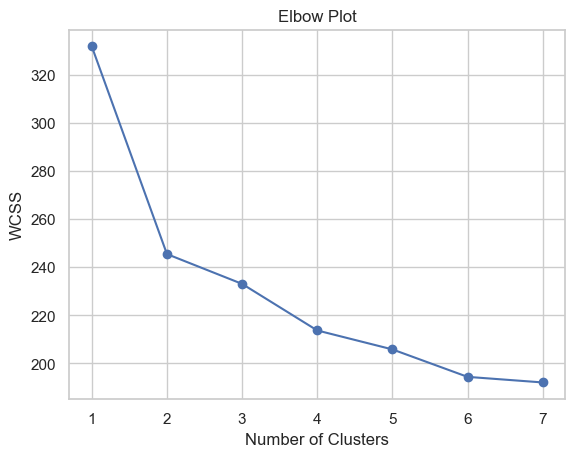

In [212]:
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

k_options = range(1, 8) # cluster options
wcss = [] # empty list for wcss

for k in k_options: # iterate through the k values
    kmedoids = KMedoids(n_clusters=k, metric='euclidean', random_state=17) # kmedoids model
    kmedoids.fit(df_std[crime_data]) 
    wcss.append(kmedoids.inertia_) 

plt.plot(k_options, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

Elbow at 2 clusters

### Silhouette score elbow plot

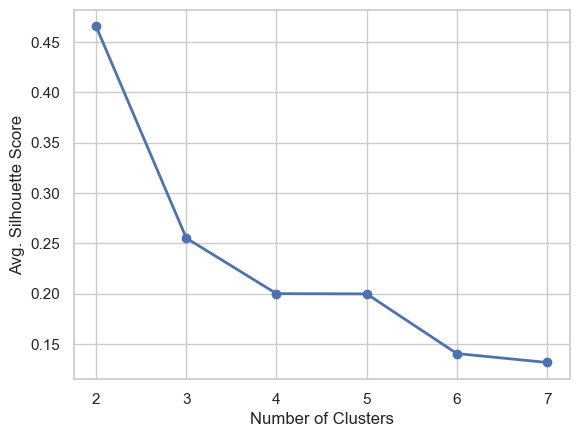

In [213]:
# silhouette score
from sklearn.metrics import silhouette_score

k_options = range(2, 8) 
avg_sil = [] # list of avg silh scores

for k in k_options: # iterate through the k values
    kmedoids = KMedoids(n_clusters=k, metric='euclidean', random_state=17) # kmedoids model
    labels = kmedoids.fit_predict(df_std[crime_data])
    silhouette_avg = silhouette_score(df_std[crime_data], 
                                      labels, metric='euclidean') # compute the avg silhouette score
    avg_sil.append(silhouette_avg)

fig, ax = plt.subplots(1, 1)
ax.plot(k_options, avg_sil, marker = 'o', lw = 2)
ax.set_xlabel("Number of Clusters", fontsize=12)
ax.set_ylabel("Avg. Silhouette Score", fontsize=12)
ax.set_xticks(k_options)
# 2

2 clusters (highest silhouette score)

### Cluster silhouette score plot

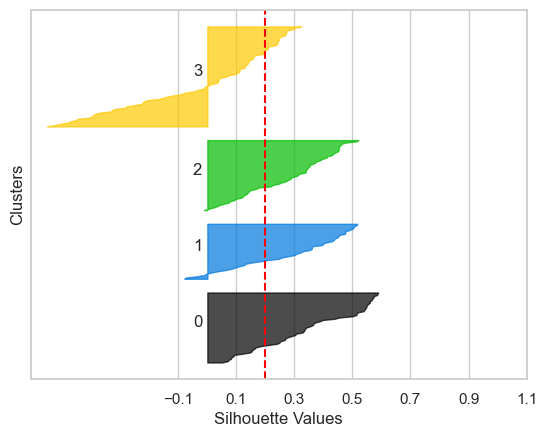

In [214]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

kmedoids = KMedoids(n_clusters=4, metric='euclidean', random_state=17)
cluster_labels  = kmedoids.fit_predict(df_std[crime_data]) 
silhouette_avg = silhouette_score(df_std[crime_data], cluster_labels)
sample_silhouette_values  = silhouette_samples(df_std[crime_data], cluster_labels)

fig, ax = plt.subplots(1, 1)
n_clusters = 4
y_lower = 10
for i in range(4):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_xlabel("Silhouette Values")
ax.set_ylabel("Clusters")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the y-axis labels / ticks
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()

### DBI Score Plot

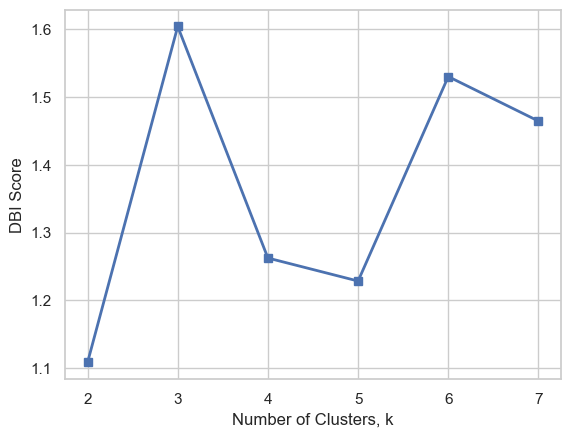

In [215]:
# DBI scores
from sklearn.metrics import pairwise_distances

k_options = range(2, 8) 
dbi = [] # empty list to store dbi scores

for k in k_options: # iterate through cluster numbers
    kmedoids = KMedoids(n_clusters=k, metric='euclidean', random_state=17) # kmedoids model
    
    labels = kmedoids.fit_predict(df_std[crime_data])
    medoids = kmedoids.cluster_centers_ # get the cluster centers
    data = df_std[crime_data] # rename for shortness

    # compute the dbi score 
    dbi_score = np.mean([max([(np.mean(pairwise_distances(data[labels == i], [medoids[i]], metric='euclidean')) +
                     np.mean(pairwise_distances(data[labels == j], [medoids[j]], metric='euclidean'))) /
                    pairwise_distances([medoids[i]], [medoids[j]], metric='euclidean')[0][0]
                    for j in np.unique(labels) if i != j]) for i in np.unique(labels)])
    
    dbi.append(dbi_score)

fig, ax = plt.subplots(1, 1)
ax.plot(k_options, dbi, marker = 's', lw = 2)
ax.set_xlabel("Number of Clusters, k", fontsize=12)
ax.set_ylabel("DBI Score", fontsize=12)
ax.set_xticks(k_options)

# 3

2 clusters (lowest DBI score)

### K-Medoids Clusters

#### Euclidean Distance

In [216]:
# k-medoids clusters with manhattan distance
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=2, metric='euclidean', random_state=17) # 2 clusters
df_std['kmedoids_man_2_clusters'] = kmedoids.fit_predict(df_std[crime_data])

kmedoids = KMedoids(n_clusters=3, metric='euclidean', random_state=17) # 3 clusters
df_std['kmedoids_man_3_clusters'] = kmedoids.fit_predict(df_std[crime_data])

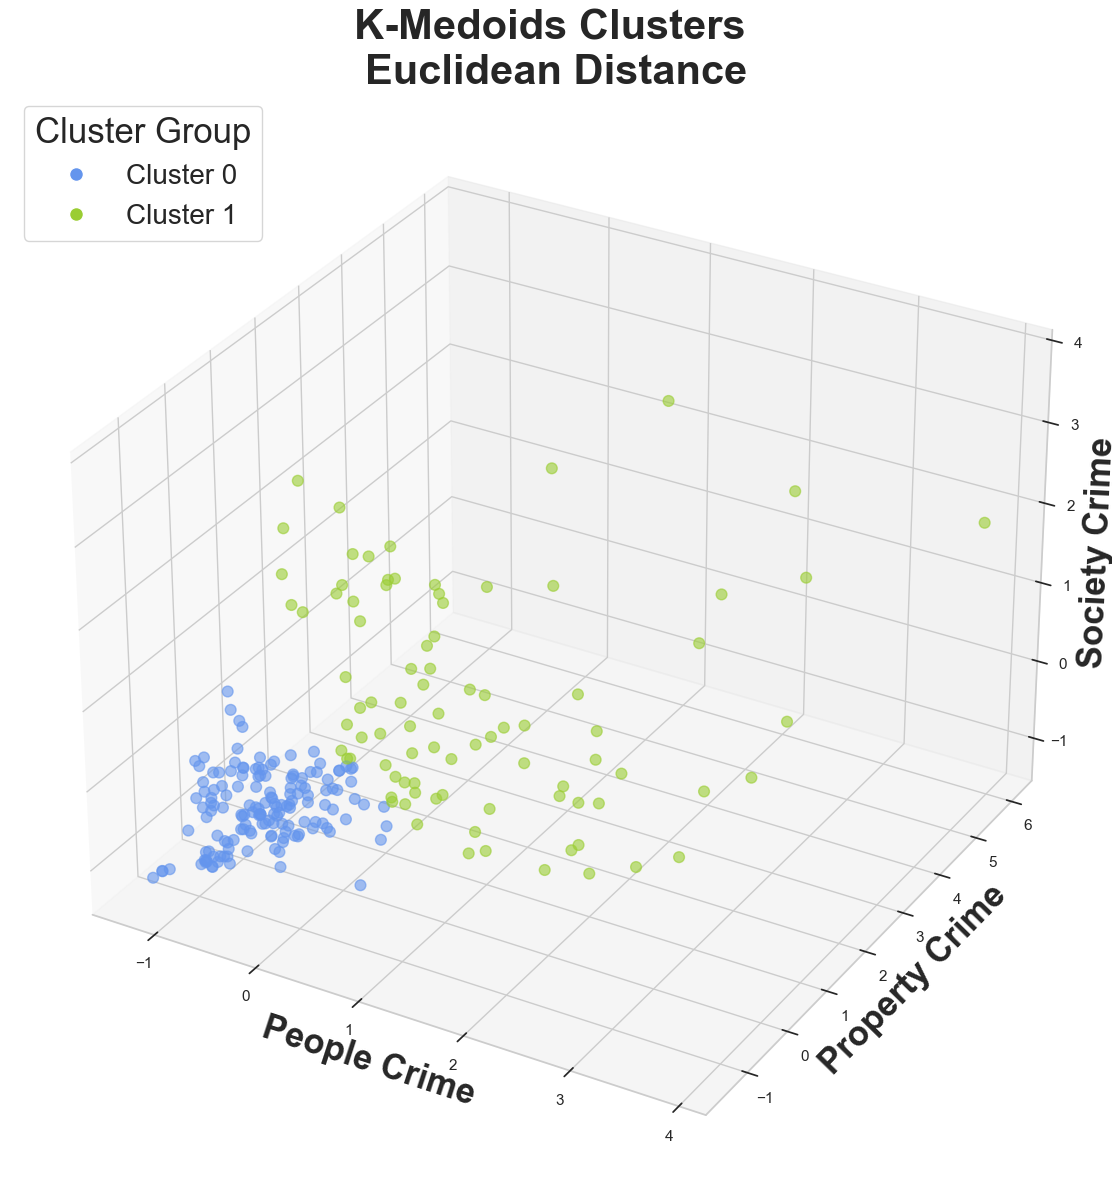

In [353]:
# 2D - 3D Scatter plots

color_map2 = {0: 'cornflowerblue', 1: 'yellowgreen'}
colors = df_std['kmedoids_man_2_clusters'].map(color_map2)

fig = plt.figure(figsize=(12, 14))

# Create a 3D scatter plot
ax1 = fig.add_subplot(111, projection='3d')  # 111 means a single plot in the figure
sc = ax1.scatter(df_std[crime_data[0]], df_std[crime_data[1]], df_std[crime_data[2]], 
                 c=colors, s=60, alpha=0.6)
ax1.set_title("K-Medoids Clusters \nEuclidean Distance", fontweight='bold', fontsize=30)
ax1.set_xlabel('People Crime', fontweight='bold', fontsize=25)
ax1.set_ylabel('Property Crime', fontweight='bold', fontsize=25)
ax1.set_zlabel('Society Crime', fontweight='bold', fontsize=25)
plt.subplots_adjust(left=0.1, right=1.5, bottom=0.1)
ax1.grid(True, linestyle='--', alpha=0.4)

# Create a legend based on the clusters
legend_labels = ['Cluster 0', 'Cluster 1']
cluster_0 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='cornflowerblue', markersize=10, label=legend_labels[0])
cluster_1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellowgreen', markersize=10, label=legend_labels[1])
ax1.legend(handles=[cluster_0, cluster_1], loc='upper left', title_fontsize=25, fontsize=20, title="Cluster Group")


plt.savefig('2D-3D_kmed_clusters.png', bbox_inches='tight')  
plt.show()

In [218]:
df_std[df_std['kmedoids_man_2_clusters']==1].shape

(87, 24)

In [219]:
df_std[df_std['kmedoids_man_2_clusters']==0].shape

(153, 24)

In [222]:
# interactive 3D plots
import plotly.express as px

# 2 clusters
color_map2 = {0: 'cornflowerblue',
             1: 'yellowgreen'} 
df_std['kmedoids_man_2_clusters'] = df_std['kmedoids_man_2_clusters'].astype('category')
fig_2_clusters = px.scatter_3d(df_std, x=crime_data[0], y=crime_data[1], z=crime_data[2], 
                               color='kmedoids_man_2_clusters', title="K-Medoids Clustering of Crime <br>Euclidean Distance",
                               color_discrete_map=color_map2,
                               hover_data={'kmedoids_man_2_clusters':False,
                                           'county': True,
                                           'year': True},
                               labels={'year':'Year',
                                       'county':'County',
                                       'crime_per1000_people':'Person Crime Rate',
                                       'crime_per1000_property':'Property Crime Rate',
                                       'crime_per1000_society':'Society Crime Rate'})

fig_2_clusters.update_traces(marker=dict(size=3, opacity=0.7))
fig_2_clusters.update_layout(
    scene=dict(
        xaxis_title="People",
        yaxis_title="Property",
        zaxis_title="Society"
    ),
    legend_title=dict(text="Cluster Group")
)
fig_2_clusters.write_html("kmedoids_cluster_plot.html")

# 3 clusters
color_map3 = {0: 'cornflowerblue',
             1: 'yellowgreen',
             2: 'tomato'} 
df_std['kmedoids_man_3_clusters'] = df_std['kmedoids_man_3_clusters'].astype('category')
fig_3_clusters = px.scatter_3d(df_std, x=crime_data[0], y=crime_data[1], z=crime_data[2], 
                               color='kmedoids_man_3_clusters', title="3 Clusters, Euclidean Distance",
                               color_discrete_map=color_map3)
fig_3_clusters.update_traces(marker=dict(size=3, opacity=0.7))
fig_3_clusters.update_layout(showlegend=False)

fig_2_clusters.show()
fig_3_clusters.show()

#### Analyze Clusters

In [223]:
# median value of variables within each cluster
# standardized varaibles
cluster_summary = df_std.groupby('kmedoids_man_2_clusters')[['prop_black', 'prop_white', 'prop_hispanic', 'prop_native', 'prop_asian',
                                                    'prop_foreign','prop_unemployed', 'prop_poverty', 'prop_crowding', 
                                                    'prop_under18','prop_over65', 'prop_education', 'median_income']].median()

/var/folders/9w/j47v51t17mgg736vvv1_qgd80000gn/T/ipykernel_30732/1706338095.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



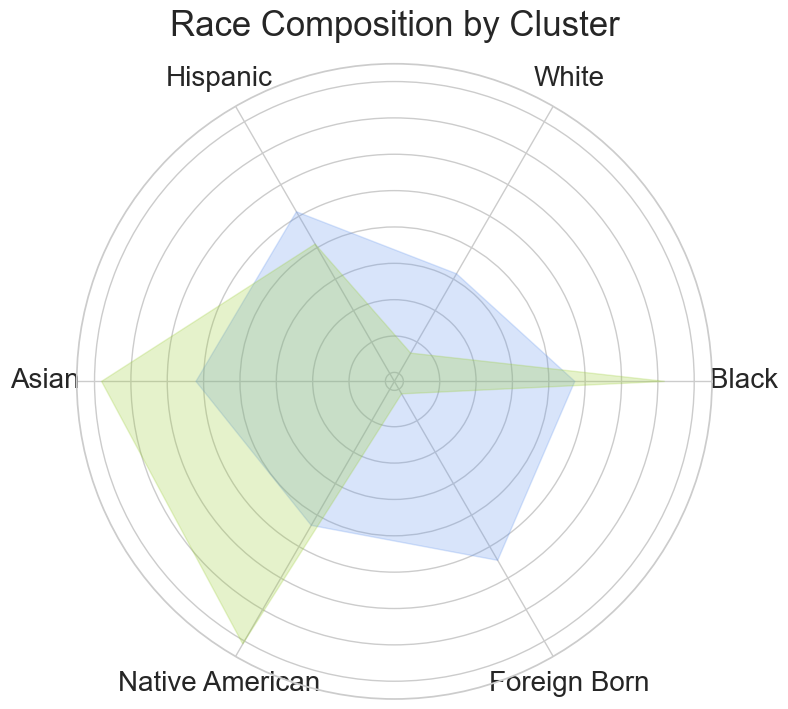

In [363]:
# radar chart for race
categories = ['Black', 'White', 'Hispanic', 'Asian', 'Native American', 'Foreign Born']
agg_race = cluster_summary[['prop_black', 'prop_white', 'prop_hispanic', 'prop_asian', 'prop_native', 'prop_foreign']]
agg_race_normalized = agg_race.div(agg_race.sum(axis=1), axis=0)

# radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

num_vars = len(categories)
values_cluster_0 = agg_race_normalized.iloc[0].values # cluster 0
values_cluster_1 = agg_race_normalized.iloc[1].values # cluster 1

# angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# radar chart circle
values_cluster_0 = np.concatenate((values_cluster_0, [values_cluster_0[0]]))
values_cluster_1 = np.concatenate((values_cluster_1, [values_cluster_1[0]]))
angles += angles[:1]

# plot clusters
ax.fill(angles, values_cluster_0, color='cornflowerblue', alpha=0.25, label='Cluster 0')
ax.fill(angles, values_cluster_1, color='yellowgreen', alpha=0.25, label='Cluster 1')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=20)
ax.tick_params(axis='x', labelsize=20, pad=10) 
plt.title('Race Composition by Cluster', fontsize=25, pad=20)

plt.savefig('radar_race_kmed.png', bbox_inches='tight') 
plt.tight_layout()
plt.show()

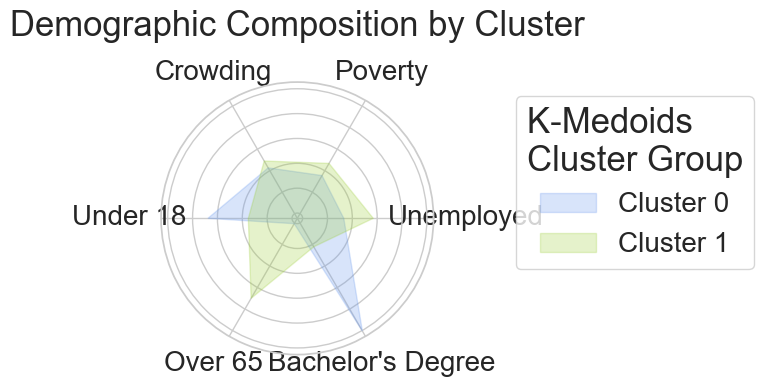

In [362]:
# Radar chart for demographics

categories = ['Unemployed', 'Poverty', 'Crowding', 'Under 18', 'Over 65', 'Bachelor\'s Degree']
agg_dem = cluster_summary[['prop_unemployed', 'prop_poverty', 'prop_crowding', 'prop_under18', 'prop_over65', 'prop_education']]
agg_dem_normalized = agg_dem.div(agg_dem.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

num_vars = len(categories)
values_cluster_0 = agg_dem_normalized.iloc[0].values # cluster 0
values_cluster_1 = agg_dem_normalized.iloc[1].values # cluster 1

# axis angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# radar chart circle
values_cluster_0 = np.concatenate((values_cluster_0, [values_cluster_0[0]]))
values_cluster_1 = np.concatenate((values_cluster_1, [values_cluster_1[0]]))
angles += angles[:1]

# plot clusters
ax.fill(angles, values_cluster_0, color='cornflowerblue', alpha=0.25, label='Cluster 0')
ax.fill(angles, values_cluster_1, color='yellowgreen', alpha=0.25, label='Cluster 1')

# Add the labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=20)
ax.tick_params(axis='x', labelsize=20, pad=10) 
plt.title('Demographic Composition by Cluster', fontsize=25, pad=17)
ax.legend(loc='upper left', bbox_to_anchor=(1.25, 1), title_fontsize=25, fontsize=20, title='K-Medoids \nCluster Group')


plt.savefig('radar_demographics_kmed.png', bbox_inches='tight') 
plt.tight_layout()
plt.show()


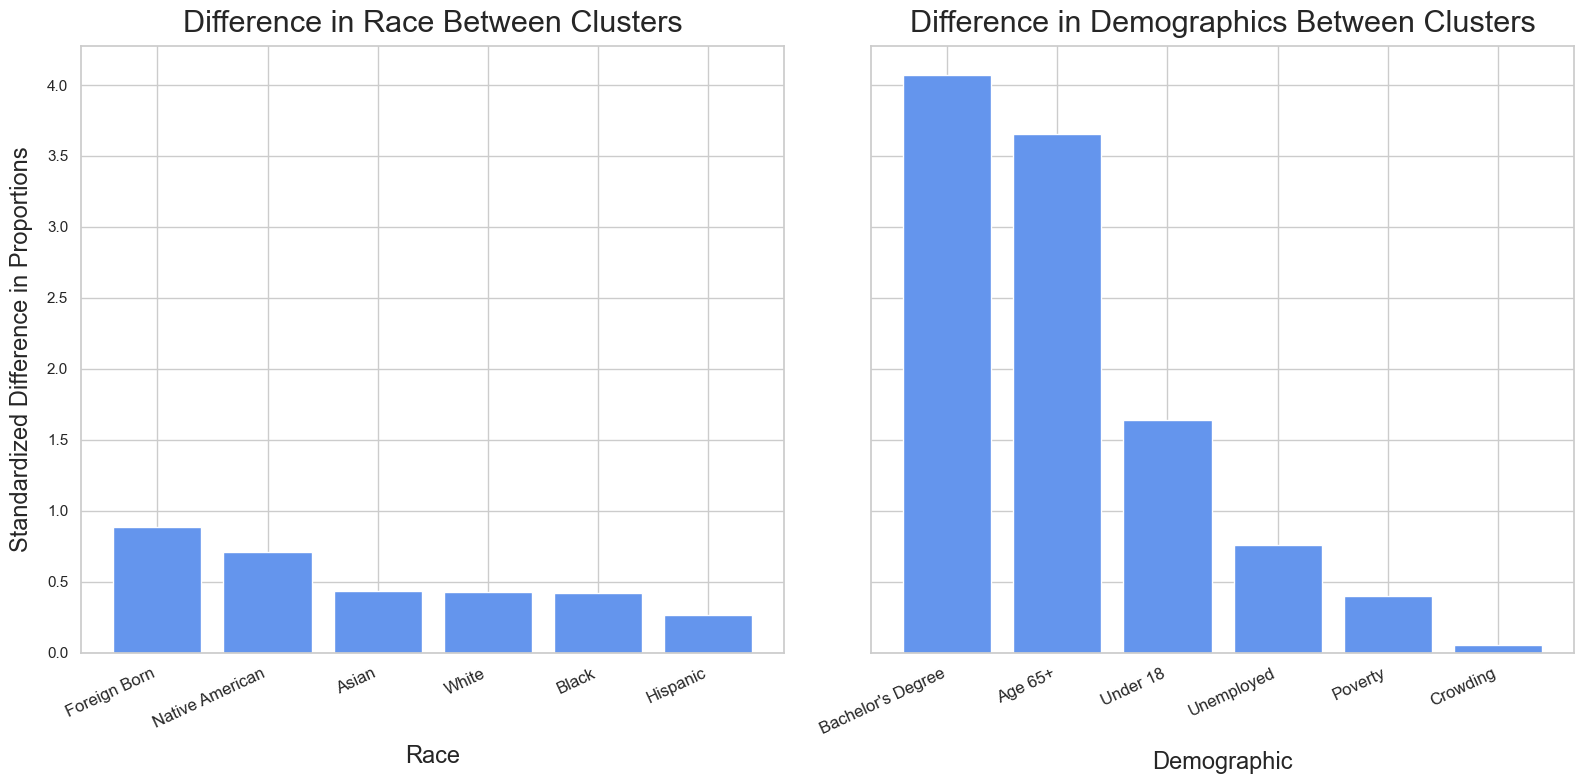

In [226]:
import matplotlib.pyplot as plt
import pandas as pd

# First bar plot: Race differences
diff_cluster_0_vs_cluster_1_race = abs(agg_race_normalized.iloc[0] - agg_race_normalized.iloc[1])
diff_df_race = pd.DataFrame({'Race': agg_race_normalized.columns, 
                             'Difference': diff_cluster_0_vs_cluster_1_race})
diff_df_race = diff_df_race.sort_values(by='Difference', ascending=False)
custom_labels_race = ['Foreign Born', 'Native American', 'Asian', 'White', 'Black', 'Hispanic']

# Second bar plot: Demographics differences
diff_cluster_0_vs_cluster_1_demo = abs(agg_dem_normalized.iloc[0] - agg_dem_normalized.iloc[1])
diff_df_demo = pd.DataFrame({'Demographic': agg_dem_normalized.columns, 
                             'Difference': diff_cluster_0_vs_cluster_1_demo})
diff_df_demo = diff_df_demo.sort_values(by='Difference', ascending=False)
custom_labels_demo = ['Bachelor\'s Degree', 'Age 65+', 'Under 18', 'Unemployed', 'Poverty', 'Crowding']

# subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# race differences
axes[0].bar(diff_df_race['Race'], diff_df_race['Difference'], color='cornflowerblue')
axes[0].set_title('Difference in Race Between Clusters', fontsize=22, pad=10)
axes[0].set_xlabel('Race', fontsize=17, labelpad=10)
axes[0].set_ylabel('Standardized Difference in Proportions', fontsize=17, labelpad=10)
axes[0].set_xticks(range(len(custom_labels_race)))
axes[0].set_xticklabels(custom_labels_race, rotation=25, ha='right', fontsize=12)

# other demographics differences
axes[1].bar(diff_df_demo['Demographic'], diff_df_demo['Difference'], color='cornflowerblue')
axes[1].set_title('Difference in Demographics Between Clusters', fontsize=22, pad=10)
axes[1].set_xlabel('Demographic', fontsize=17, labelpad=10)
axes[1].set_xticks(range(len(custom_labels_demo)))
axes[1].set_xticklabels(custom_labels_demo, rotation=25, ha='right', fontsize=12)

plt.tight_layout()
plt.savefig('combined_diff_clusters_kmed.png')
plt.show()

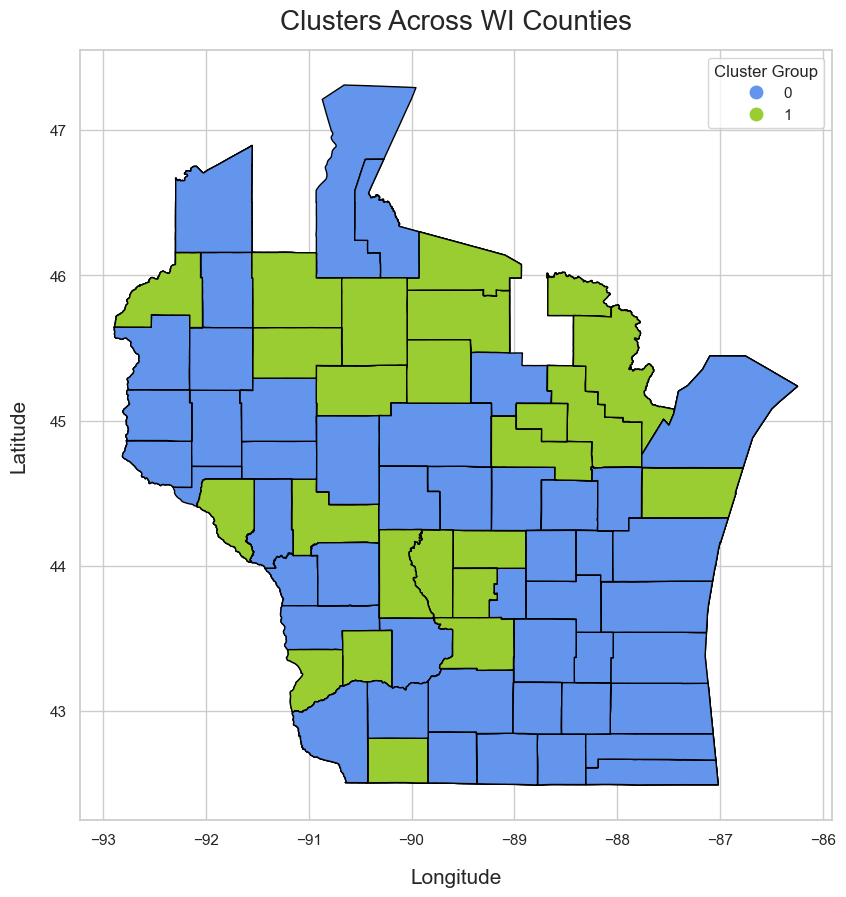

In [227]:
# Plot the counties colored by 'agg_2_clusters'
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap([ 'cornflowerblue', 'yellowgreen'] )

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the map using 'agg_2_clusters' for coloring the counties
wi_df_reduced.plot(column='kmedoids_man_2_clusters', ax=ax, 
                   edgecolor='black', cmap=custom_cmap, legend=True,
                   legend_kwds={'title': "Cluster Group"})

ax.set_title("Clusters Across WI Counties", fontsize=20, pad=15)
ax.set_xlabel("Longitude", fontsize=15, labelpad=15)
ax.set_ylabel("Latitude", fontsize=15, labelpad=15)
plt.savefig('wi_plot_kmed.png')
plt.show()

#### Mahalanobis Distance - didn't use

In [228]:
# mahalanobis distances
from scipy.spatial.distance import pdist, squareform

# covariance matrix and inverse
cov_matrix = np.cov(df_std[crime_data].T) 
inv_cov_matrix = np.linalg.inv(cov_matrix)

# pairwise Mahalanobis distances
distance_matrix = squareform(pdist(df_std[crime_data], metric='mahalanobis', VI=inv_cov_matrix))

# 2 clusters
kmedoids = KMedoids(n_clusters=2, metric='precomputed', random_state=17) 
df_std['kmedoids_mah_2_clusters'] = kmedoids.fit_predict(distance_matrix)

# 3 clusters
kmedoids = KMedoids(n_clusters=3, metric='precomputed', random_state=17) 
df_std['kmedoids_mah_3_clusters'] = kmedoids.fit_predict(distance_matrix)

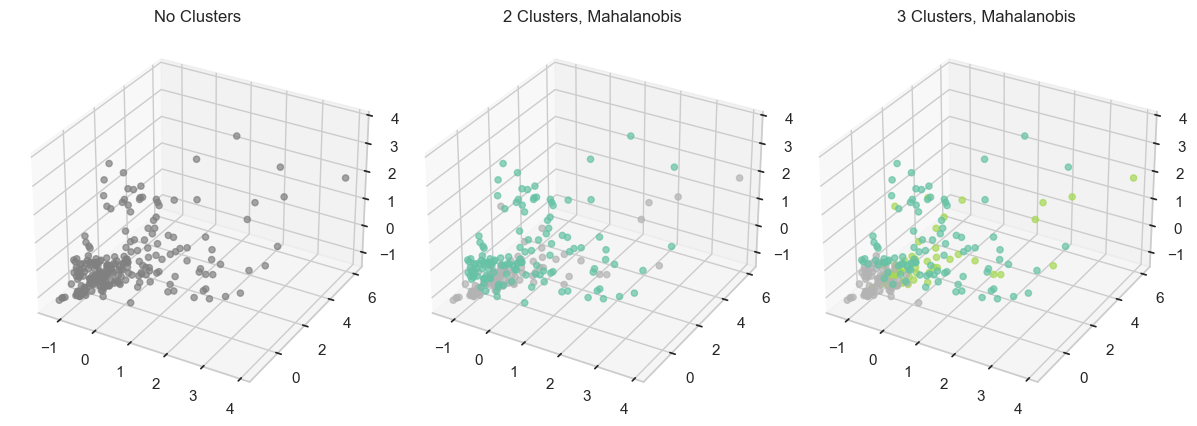

In [229]:
# 2D - 3D plots
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))

# no clusters
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df_std['crime_per1000_people'], df_std['crime_per1000_property'], df_std['crime_per1000_society'], 
            c='gray', alpha=0.7)
ax1.set_title("No Clusters")

# 2 K-Medoids clusters
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(df_std['crime_per1000_people'], df_std['crime_per1000_property'], df_std['crime_per1000_society'], 
                       c=df_std['kmedoids_mah_2_clusters'], cmap='Set2', alpha=0.7)
ax2.set_title("2 Clusters, Mahalanobis")

# 3 K-Medoids clusters
ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(df_std['crime_per1000_people'], df_std['crime_per1000_property'], df_std['crime_per1000_society'], 
                       c=df_std['kmedoids_mah_3_clusters'], cmap='Set2', alpha=0.7)
ax3.set_title("3 Clusters, Mahalanobis")

plt.tight_layout()
plt.show()

In [230]:
# interactive 3D plots
import plotly.express as px

# 2 clusters
fig_2_clusters = px.scatter_3d(df_std, x=crime_data[0], y=crime_data[1], z=crime_data[2], 
                               color='kmedoids_mah_2_clusters', title="2 Clusters, Mahalanobis",
                               color_discrete_sequence=px.colors.qualitative.Set2)
fig_2_clusters.update_traces(marker=dict(size=3, opacity=0.7))

# 3 clusters
fig_3_clusters = px.scatter_3d(df_std, x=crime_data[0], y=crime_data[1], z=crime_data[2], 
                               color='kmedoids_mah_3_clusters', title="3 Clusters, Mahalanobis",
                               color_discrete_sequence=px.colors.qualitative.Set2)
fig_3_clusters.update_traces(marker=dict(size=3, opacity=0.7))

# Show the plots
fig_2_clusters.show()
fig_3_clusters.show()

#### DB-Scan - didn't use

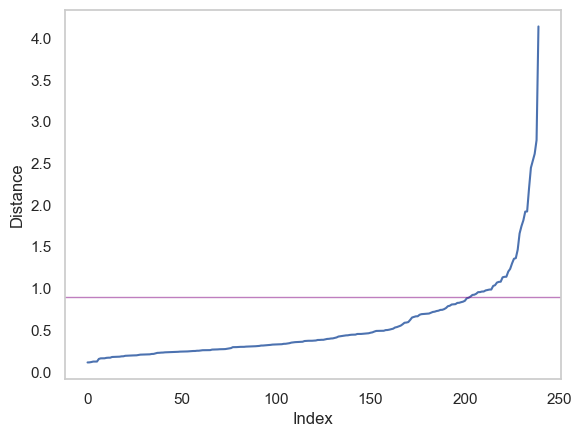

In [232]:
from sklearn.neighbors import NearestNeighbors

# 6 neighbors that isn't yourself
nbrs = NearestNeighbors(n_neighbors=7, algorithm='auto', metric='euclidean') # only works with euclidean
nbrs.fit(df_std[crime_data])

# distances to all the neighbors
distances, indices = nbrs.kneighbors(df_std[crime_data])

six_nearest_distances = distances[:, 6]

# sort and plot the distances 
sorted_distances = np.sort(six_nearest_distances)
plt.plot(sorted_distances)
plt.grid()
plt.ylabel("Distance")
plt.xlabel("Index")
plt.axhline(.9, color='purple', alpha=0.5, linewidth=1)

In [233]:
# Fit DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=6)
df_std['dbscan_clusters'] = dbscan.fit_predict(df_std[crime_data])

num_clusters = len(np.unique(df_std['dbscan_clusters'])) - (1 if -1 in np.unique(df_std['dbscan_clusters']) else 0)
print(num_clusters)

1


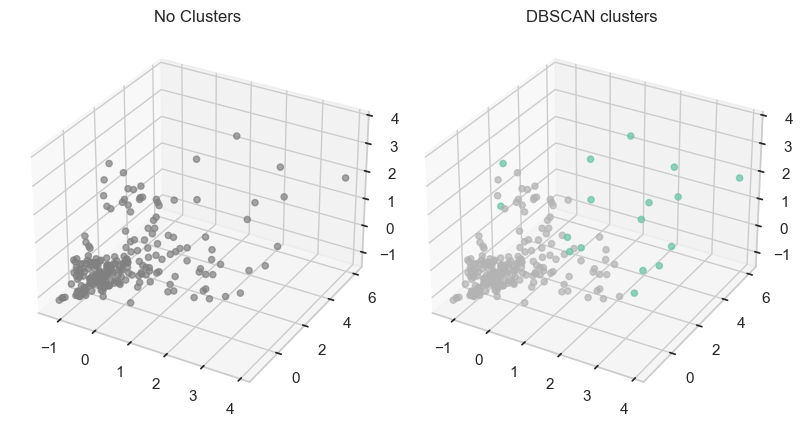

In [234]:
# 2D - 3D plots
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))

# no clusters
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df_std['crime_per1000_people'], df_std['crime_per1000_property'], df_std['crime_per1000_society'], c='gray', alpha=0.7)
ax1.set_title("No Clusters")

# DBSCAN clusters
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(df_std['crime_per1000_people'], df_std['crime_per1000_property'], df_std['crime_per1000_society'], 
                       c=df_std['dbscan_clusters'], cmap='Set2', alpha=0.7)
ax2.set_title("DBSCAN clusters")


plt.tight_layout()
plt.show()

In [235]:
# interactive 3D plots
import plotly.express as px

# 2 clusters - DBSCAN
fig_2_clusters = px.scatter_3d(df_std, x=crime_data[0], y=crime_data[1], z=crime_data[2], 
                               color='dbscan_clusters', title="DBSCAN",
                               color_discrete_sequence=px.colors.qualitative.Set2)
fig_2_clusters.update_traces(marker=dict(size=3, opacity=0.7))

# Show the plots
fig_2_clusters.show()

one cluster?

### Hierachrial clustering

#### Euclidean distance and ward linkage

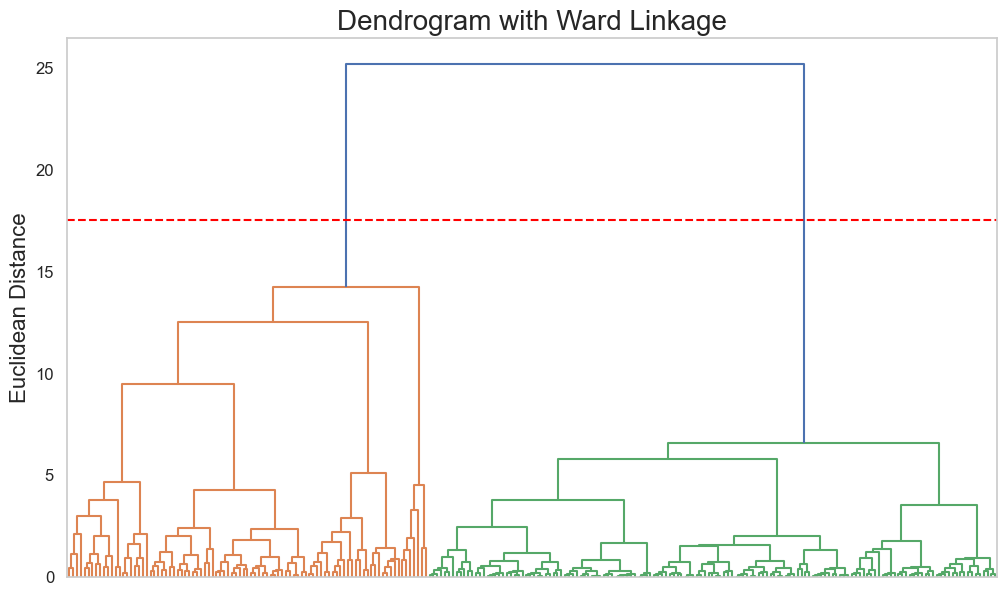

In [236]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# hierarchical clustering
plt.figure(figsize=(12, 7)) 
plt.grid(False) 
linked = linkage(df_std[crime_data], method='ward', metric='euclidean')

# dendrogram
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending', 
           color_threshold=20) 

threshold = 0.7 * 25
plt.axhline(y=threshold, color='red', linestyle='--')
plt.ylabel("Euclidean Distance", fontsize=16)
plt.title('Dendrogram with Ward Linkage', fontsize=20)
plt.xticks([])
plt.yticks(fontsize=12) 

plt.savefig('dendrogram.png', bbox_inches='tight') 

2 clusters 

Text(0.5, 1.0, 'Dendogram with Complete Linkage')

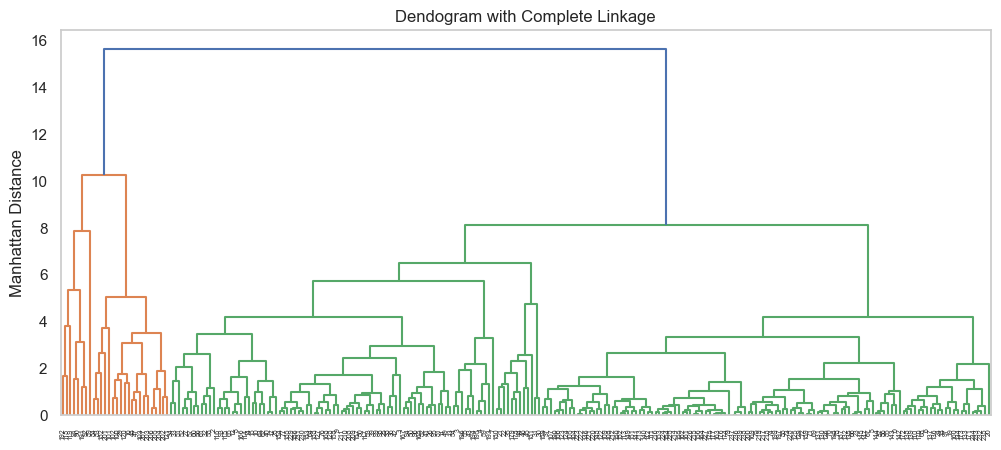

In [237]:
# dendrogram
plt.figure(figsize=(12, 5))
plt.grid()
linked = linkage(df_std[crime_data], method='complete', metric='cityblock')
dendrogram(linked, orientation='top', distance_sort='descending');
plt.ylabel("Manhattan Distance")
plt.title('Dendogram with Complete Linkage')

2 or 3 clusters

### Visualize Hierchial Clusters

In [238]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
df_std['agg_2_clusters'] = agg_clustering.fit_predict(df_std[crime_data])

agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df_std['agg_3_clusters'] = agg_clustering.fit_predict(df_std[crime_data])

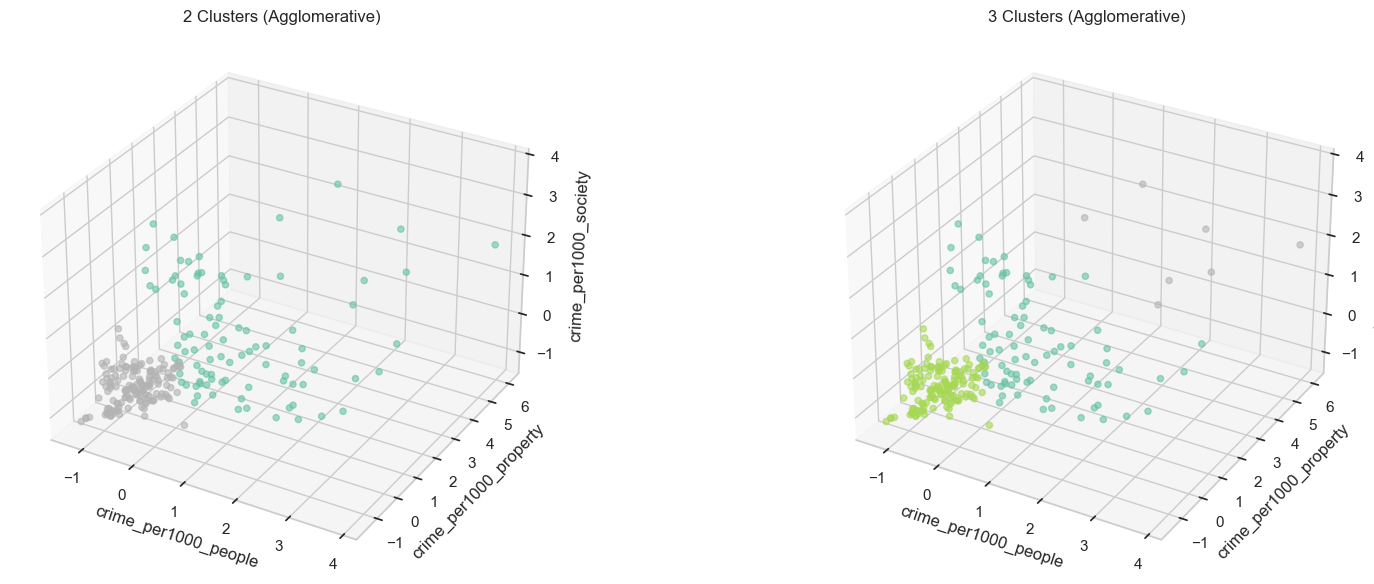

In [239]:
# 2D - 3D plot
fig = plt.figure(figsize=(18, 6))

# 2 clusters plot
ax1 = fig.add_subplot(121, projection='3d')
sc = ax1.scatter(df_std[crime_data[0]], df_std[crime_data[1]], df_std[crime_data[2]], 
                 c=df_std['agg_2_clusters'], cmap='Set2', alpha=0.6)
ax1.set_title("2 Clusters (Agglomerative)")
ax1.set_xlabel(crime_data[0])
ax1.set_ylabel(crime_data[1])
ax1.set_zlabel(crime_data[2])

# 3 clusters plot
ax2 = fig.add_subplot(122, projection='3d')
sc = ax2.scatter(df_std[crime_data[0]], df_std[crime_data[1]], df_std[crime_data[2]], 
                 c=df_std['agg_3_clusters'], cmap='Set2', alpha=0.6)
ax2.set_title("3 Clusters (Agglomerative)")
ax2.set_xlabel(crime_data[0])
ax2.set_ylabel(crime_data[1])
ax2.set_zlabel(crime_data[2])


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [264]:
# interactive 3D plots
import plotly.express as px

# 2 clusters

color_map2 = {1:'cornflowerblue', 
              0:'yellowgreen'} 

df_std['agg_2_clusters'] = df_std['agg_2_clusters'].astype('category')

fig_2_clusters = px.scatter_3d(df_std, x=crime_data[0], y=crime_data[1], z=crime_data[2], 
                               color='agg_2_clusters', 
                               title="Agglomerative Clustering of Crime <br>Euclidean Distance with Ward Linkage",
                               hover_data={'agg_2_clusters':False,
                                           'county': True,
                                           'year': True},
                               labels={'year':'Year',
                                       'county':'County',
                                       'crime_per1000_people':'Person Crime Rate',
                                       'crime_per1000_property':'Property Crime Rate',
                                       'crime_per1000_society':'Society Crime Rate'},
                               color_discrete_map=color_map2)
fig_2_clusters.update_traces(marker=dict(size=3, opacity=0.7))
fig_2_clusters.update_layout(
    scene=dict(
        xaxis_title="People",
        yaxis_title="Property",
        zaxis_title="Society"
    ),
    legend_title=dict(text="Cluster Group")
)
fig_2_clusters.write_html("hierachrial_cluster_plot.html")


# 3 clusters
color_map3 = {0: 'cornflowerblue',
             1: 'yellowgreen',
             2: 'tomato'} 
df_std['agg_3_clusters'] = df_std['agg_3_clusters'].astype('category')
fig_3_clusters = px.scatter_3d(df_std, x=crime_data[0], y=crime_data[1], z=crime_data[2], 
                               color='agg_3_clusters',
                               color_discrete_map=color_map3)
fig_3_clusters.update_traces(marker=dict(size=3, opacity=0.7))
fig_3_clusters.update_layout(showlegend=False)


# Show the plots
fig_2_clusters.show()
fig_3_clusters.show()

### Evaluation of Hierarchial Clusters

In [242]:
# median value of variables within each cluster
# standardized varaibles
cluster_summary = df_std.groupby('agg_2_clusters')[['prop_black', 'prop_white', 'prop_hispanic', 'prop_native', 'prop_asian',
                                                    'prop_foreign','prop_unemployed', 'prop_poverty', 'prop_crowding', 
                                                    'prop_under18','prop_over65', 'prop_education', 'median_income']].median()

/var/folders/9w/j47v51t17mgg736vvv1_qgd80000gn/T/ipykernel_30732/4063594500.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Race

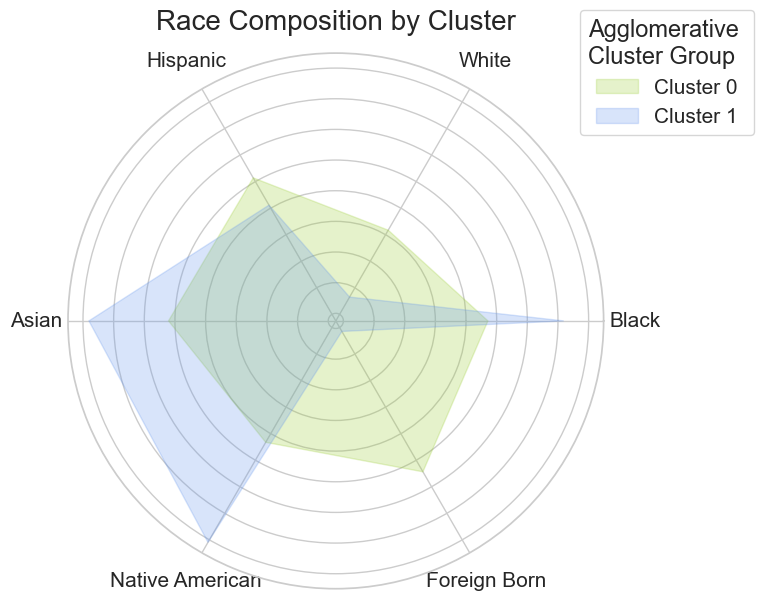

In [266]:
# radar chart for race
categories = ['Black', 'White', 'Hispanic', 'Asian', 'Native American', 'Foreign Born']
agg_race = cluster_summary[['prop_black', 'prop_white', 'prop_hispanic', 'prop_asian', 'prop_native', 'prop_foreign']]
agg_race_normalized = agg_race.div(agg_race.sum(axis=1), axis=0)

# radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

num_vars = len(categories)
values_cluster_0 = agg_race_normalized.iloc[0].values # cluster 0
values_cluster_1 = agg_race_normalized.iloc[1].values # cluster 1

# angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# radar chart circle
values_cluster_0 = np.concatenate((values_cluster_0, [values_cluster_0[0]]))
values_cluster_1 = np.concatenate((values_cluster_1, [values_cluster_1[0]]))
angles += angles[:1]

# plot clusters
ax.fill(angles, values_cluster_0, color='yellowgreen', alpha=0.25, label='Cluster 0')
ax.fill(angles, values_cluster_1, color='cornflowerblue', alpha=0.25, label='Cluster 1')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=15)
ax.tick_params(axis='x', labelsize=15, pad=10) 
plt.title('Race Composition by Cluster', fontsize=20, pad=17)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title_fontsize=17, fontsize=15, title='Agglomerative \nCluster Group')

plt.savefig('radar_race.png', bbox_inches='tight') 
plt.tight_layout()
plt.show()

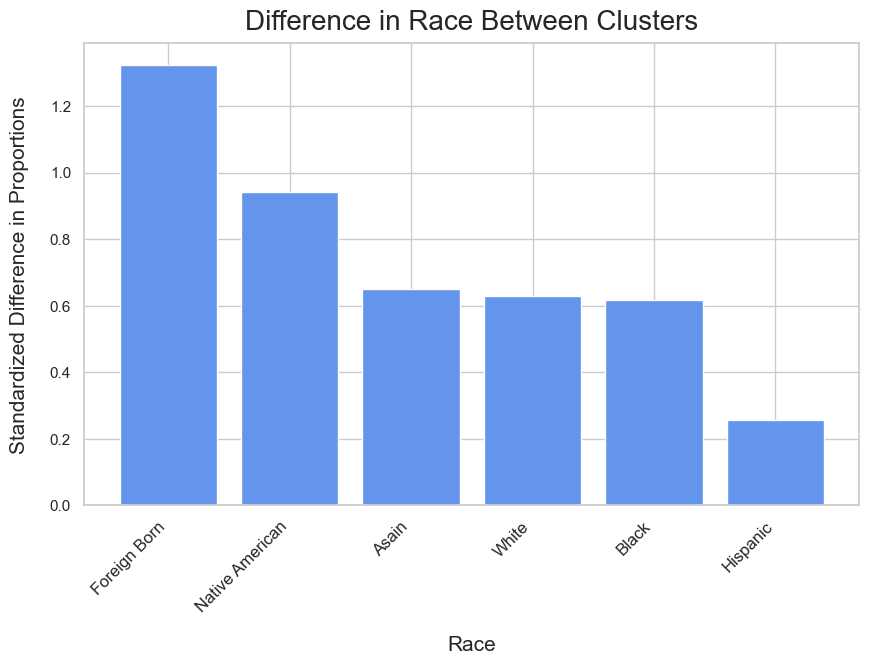

In [244]:
# difference between the two clusters
diff_cluster_0_vs_cluster_1 = abs(agg_race_normalized.iloc[0] - agg_race_normalized.iloc[1])

diff_df = pd.DataFrame({'Race': agg_race_normalized.columns, 
                        'Difference': diff_cluster_0_vs_cluster_1})

diff_df = diff_df.sort_values(by='Difference', ascending=False)
custom_labels = [
    'Foreign Born',  
    'Native American',  
    'Asain',
    'White', 
    'Black',
    'Hispanic']

plt.figure(figsize=(10, 6))
plt.bar(diff_df['Race'], diff_df['Difference'], color='cornflowerblue')
plt.title('Difference in Race Between Clusters', fontsize=20, pad=10)
plt.xlabel('Race', fontsize=15, labelpad=15)
plt.ylabel('Standardized Difference in Proportions', fontsize=15, labelpad=15)
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45, ha='right', fontsize=12)
plt.savefig('diff_race.png')

#### Other Population Features

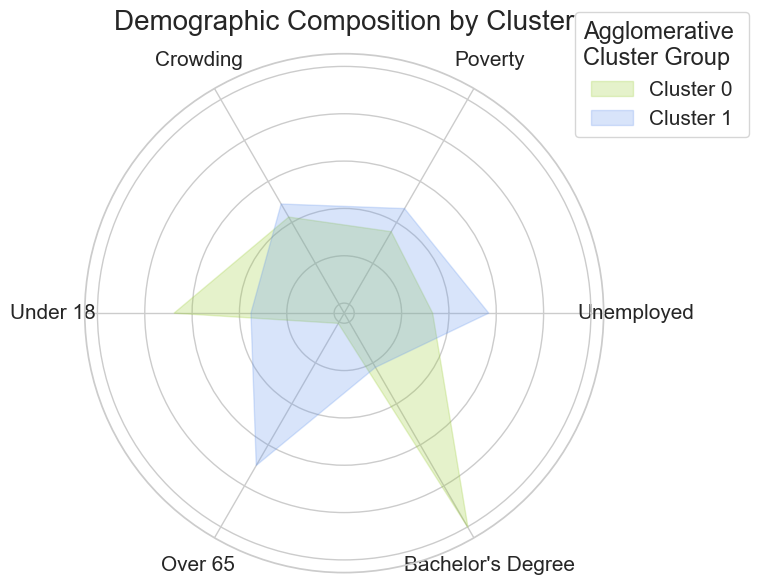

In [267]:
# Radar chart for demographics

categories = ['Unemployed', 'Poverty', 'Crowding', 'Under 18', 'Over 65', 'Bachelor\'s Degree']
agg_dem = cluster_summary[['prop_unemployed', 'prop_poverty', 'prop_crowding', 'prop_under18', 'prop_over65', 'prop_education']]
agg_dem_normalized = agg_dem.div(agg_dem.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

num_vars = len(categories)
values_cluster_0 = agg_dem_normalized.iloc[0].values # cluster 0
values_cluster_1 = agg_dem_normalized.iloc[1].values # cluster 1

# axis angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# radar chart circle
values_cluster_0 = np.concatenate((values_cluster_0, [values_cluster_0[0]]))
values_cluster_1 = np.concatenate((values_cluster_1, [values_cluster_1[0]]))
angles += angles[:1]

# plot clusters
ax.fill(angles, values_cluster_0, color='yellowgreen', alpha=0.25, label='Cluster 0')
ax.fill(angles, values_cluster_1, color='cornflowerblue', alpha=0.25, label='Cluster 1')

# Add the labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=15)
ax.tick_params(axis='x', labelsize=15, pad=10) 
plt.title('Demographic Composition by Cluster', fontsize=20, pad=17)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title_fontsize=17, fontsize=15, title="Agglomerative \nCluster Group")

plt.savefig('radar_demographics.png', bbox_inches='tight') 
plt.tight_layout()
plt.show()


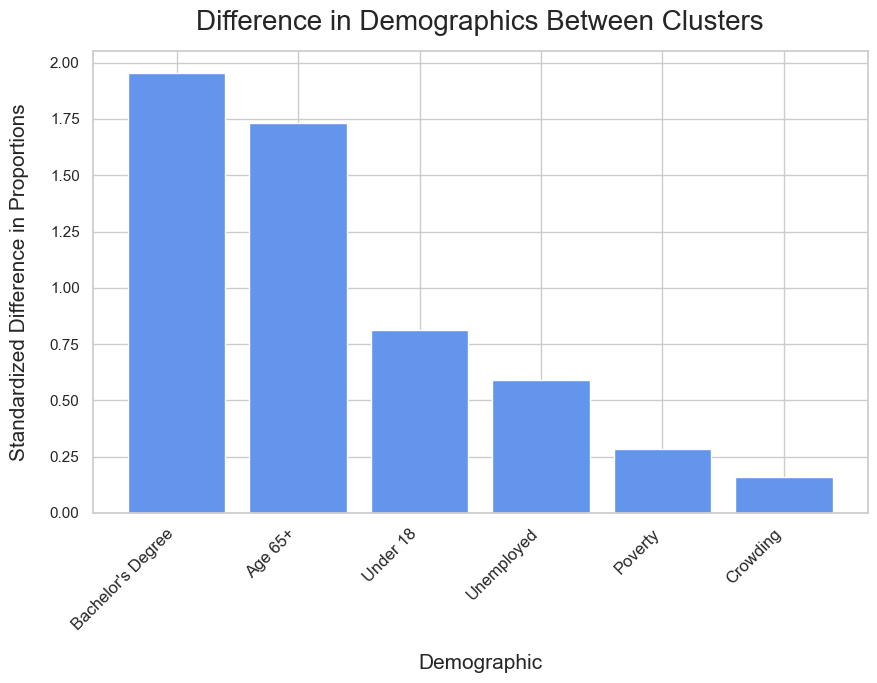

In [246]:
# difference between the two clusters
diff_cluster_0_vs_cluster_1 = abs(agg_dem_normalized.iloc[0] - agg_dem_normalized.iloc[1])

diff_df = pd.DataFrame({'Demographic': agg_dem_normalized.columns, 
                        'Difference': diff_cluster_0_vs_cluster_1})

diff_df = diff_df.sort_values(by='Difference', ascending=False)
custom_labels = [
    'Bachelor\'s Degree',  
    'Age 65+',  
    'Under 18',
    'Unemployed', 
    'Poverty',
    'Crowding']

plt.figure(figsize=(10, 6))
plt.bar(diff_df['Demographic'], diff_df['Difference'], color='cornflowerblue')
plt.title('Difference in Demographics Between Clusters', fontsize=20, pad=15)
plt.xlabel('Demographic', fontsize=15, labelpad=15)
plt.ylabel('Standardized Difference in Proportions', fontsize=15, labelpad=15)
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45, ha='right', fontsize=12)
plt.savefig('diff_dem.png')

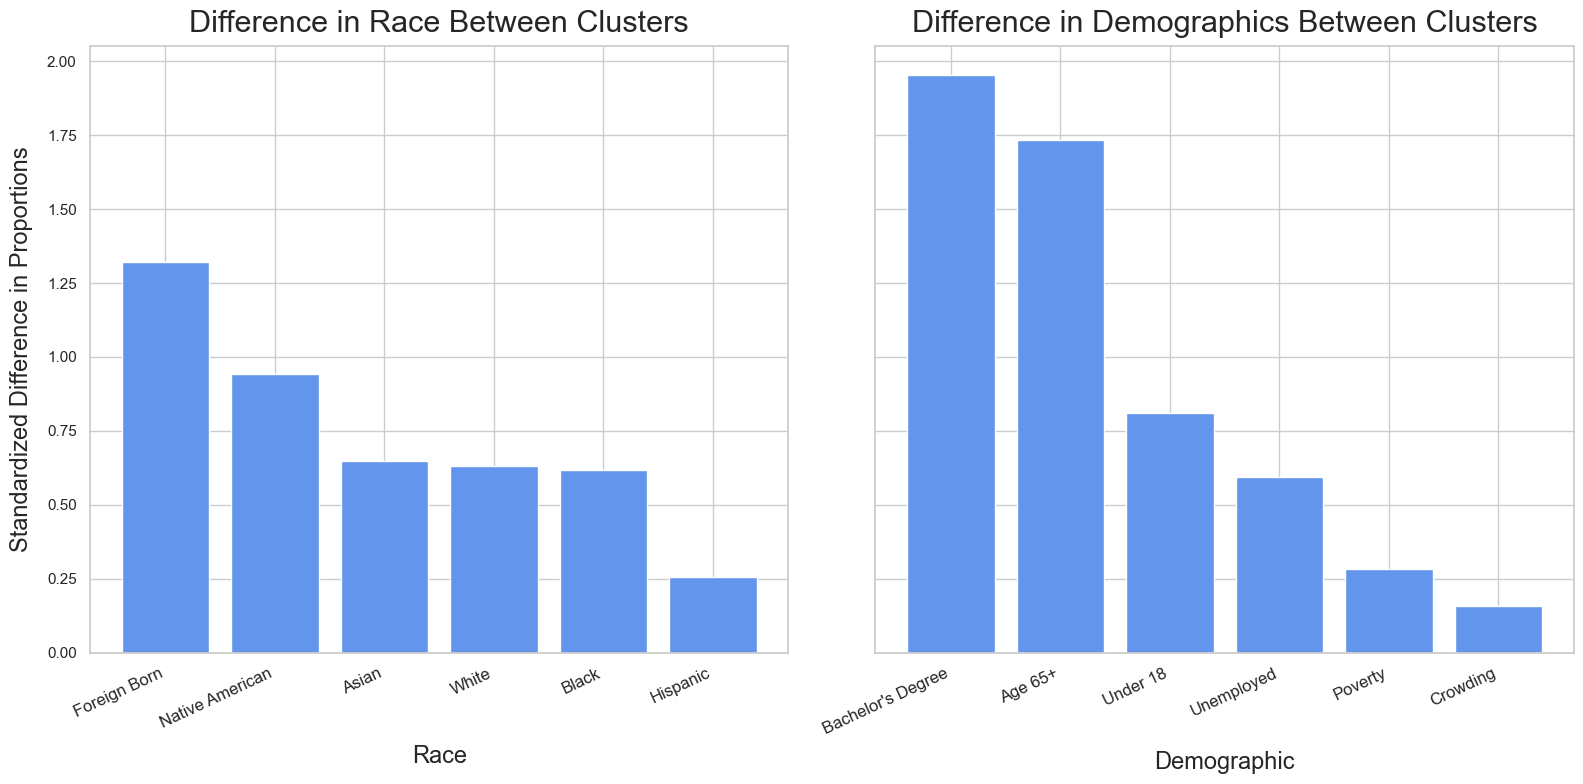

In [247]:
import matplotlib.pyplot as plt
import pandas as pd

# First bar plot: Race differences
diff_cluster_0_vs_cluster_1_race = abs(agg_race_normalized.iloc[0] - agg_race_normalized.iloc[1])
diff_df_race = pd.DataFrame({'Race': agg_race_normalized.columns, 
                             'Difference': diff_cluster_0_vs_cluster_1_race})
diff_df_race = diff_df_race.sort_values(by='Difference', ascending=False)
custom_labels_race = ['Foreign Born', 'Native American', 'Asian', 'White', 'Black', 'Hispanic']

# Second bar plot: Demographics differences
diff_cluster_0_vs_cluster_1_demo = abs(agg_dem_normalized.iloc[0] - agg_dem_normalized.iloc[1])
diff_df_demo = pd.DataFrame({'Demographic': agg_dem_normalized.columns, 
                             'Difference': diff_cluster_0_vs_cluster_1_demo})
diff_df_demo = diff_df_demo.sort_values(by='Difference', ascending=False)
custom_labels_demo = ['Bachelor\'s Degree', 'Age 65+', 'Under 18', 'Unemployed', 'Poverty', 'Crowding']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot race differences
axes[0].bar(diff_df_race['Race'], diff_df_race['Difference'], color='cornflowerblue')
axes[0].set_title('Difference in Race Between Clusters', fontsize=22, pad=10)
axes[0].set_xlabel('Race', fontsize=17, labelpad=10)
axes[0].set_ylabel('Standardized Difference in Proportions', fontsize=17, labelpad=10)
axes[0].set_xticks(range(len(custom_labels_race)))
axes[0].set_xticklabels(custom_labels_race, rotation=25, ha='right', fontsize=12)

# Plot demographics differences
axes[1].bar(diff_df_demo['Demographic'], diff_df_demo['Difference'], color='cornflowerblue')
axes[1].set_title('Difference in Demographics Between Clusters', fontsize=22, pad=10)
axes[1].set_xlabel('Demographic', fontsize=17, labelpad=10)
axes[1].set_xticks(range(len(custom_labels_demo)))
axes[1].set_xticklabels(custom_labels_demo, rotation=25, ha='right', fontsize=12)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('combined_diff_clusters.png')
plt.show()


### Wisconsin Mapping

In [248]:
# merge dfs
wi_df = wi.merge(df_std, left_on='NAME', right_on='county', how='left')
wi_df.shape
print(type(wi_df))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [249]:
# remove uncessary variables
wi_df_reduced = wi_df[['county', 'agg_2_clusters', 'kmedoids_man_2_clusters', 'STATEFP', 'COUNTYFP', 'COUNTYNS',
       'GEOID', 'NAME', 'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP',
       'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'geometry']]
wi_df_reduced.head(2)

county agg_2_clusters kmedoids_man_2_clusters STATEFP COUNTYFP  COUNTYNS  \
0   Sauk              0                       1      55      111  01581115   
1   Sauk              0                       1      55      111  01581115   

   GEOID  NAME     NAMELSAD LSAD  ...  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
0  55111  Sauk  Sauk County   06  ...  G4020   357  12660     None        A   
1  55111  Sauk  Sauk County   06  ...  G4020   357  12660     None        A   

        ALAND    AWATER     INTPTLAT      INTPTLON  \
0  2153685971  45692999  +43.4280010  -089.9433184   
1  2153685971  45692999  +43.4280010  -089.9433184   

                                            geometry  
0  POLYGON ((-90.19196 43.555, -90.19676 43.55494...  
1  POLYGON ((-90.19196 43.555, -90.19676 43.55494...  

[2 rows x 21 columns]

In [250]:
# make factor clusters
wi_df_reduced.loc[:, 'agg_2_clusters'] = wi_df_reduced['agg_2_clusters'].astype('category')
wi_df_reduced.loc[:, 'kmedoids_man_2_clusters'] = wi_df_reduced['kmedoids_man_2_clusters'].astype('category')

In [251]:
df_std[df_std['county']=='Forest']
df_std[df_std['county']=='Bayfield']

Empty DataFrame
Columns: [county, FIPS, prop_black, prop_white, prop_hispanic, prop_native, prop_asian, prop_foreign, prop_unemployed, prop_poverty, prop_under18, prop_over65, prop_education, median_income, prop_crowding, population, total_offenses, year, crime_per1000_people, crime_per1000_property, crime_per1000_society, crime_per1000_total, kmedoids_man_2_clusters, kmedoids_man_3_clusters, kmedoids_mah_2_clusters, kmedoids_mah_3_clusters, dbscan_clusters, agg_2_clusters, agg_3_clusters]
Index: []

[0 rows x 29 columns]

In [252]:
wi_df_reduced[wi_df_reduced['agg_2_clusters'].isnull()]

county agg_2_clusters kmedoids_man_2_clusters STATEFP COUNTYFP  COUNTYNS  \
61    NaN            NaN                     NaN      55      007  01581063   
89    NaN            NaN                     NaN      55      041  01581080   

    GEOID      NAME         NAMELSAD LSAD  ...  MTFCC CSAFP CBSAFP METDIVFP  \
61  55007  Bayfield  Bayfield County   06  ...  G4020  None   None     None   
89  55041    Forest    Forest County   06  ...  G4020  None   None     None   

   FUNCSTAT       ALAND      AWATER     INTPTLAT      INTPTLON  \
61        A  3827675487  1460302486  +46.6341992  -091.1772815   
89        A  2626878506    83594186  +45.6668806  -088.7733265   

                                             geometry  
61  POLYGON ((-90.92542 46.5873, -90.92706 46.5854...  
89  POLYGON ((-89.04693 45.63724, -89.04693 45.637...  

[2 rows x 21 columns]

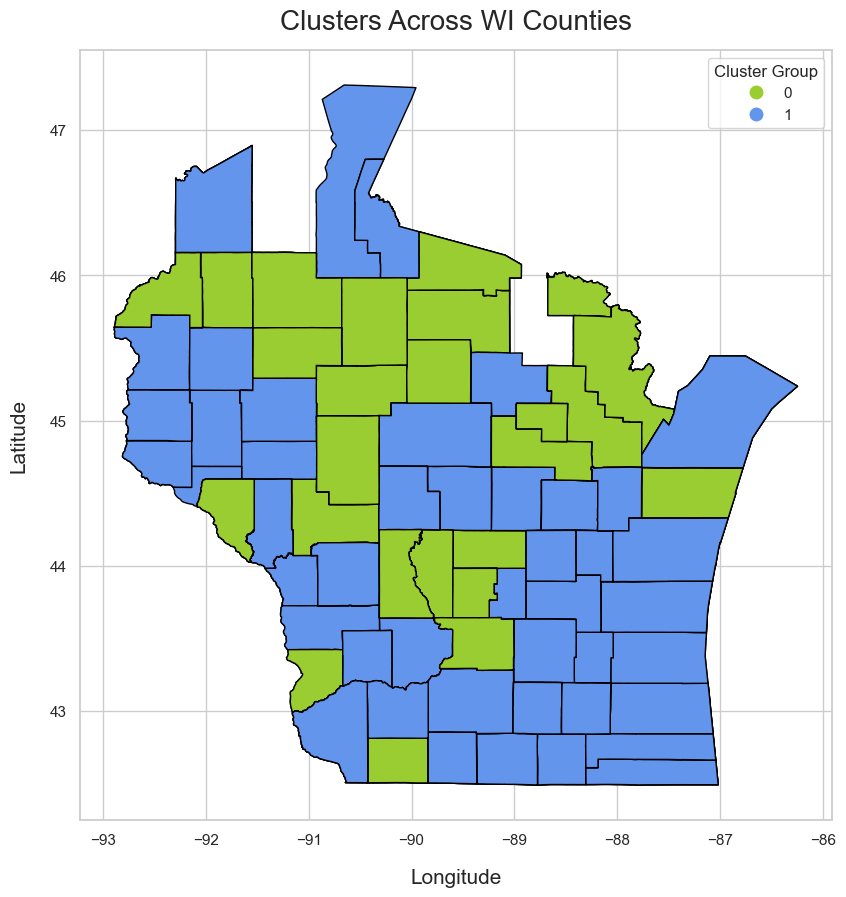

In [253]:
# Plot the counties colored by 'agg_2_clusters'
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['yellowgreen', 'cornflowerblue'] )

fig, ax = plt.subplots(figsize=(10, 10))

wi_df_reduced.plot(column='agg_2_clusters', ax=ax, 
                   edgecolor='black', cmap=custom_cmap, legend=True,
                   legend_kwds={'title': "Cluster Group"})

ax.set_title("Clusters Across WI Counties", fontsize=20, pad=15)
ax.set_xlabel("Longitude", fontsize=15, labelpad=15)
ax.set_ylabel("Latitude", fontsize=15, labelpad=15)
plt.savefig('wi_plot.png')
plt.show()